<div style="border:solid green 2px; padding: 20px">
<b>Мадихан, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Поменял установку модуля seaborn - должно заработать если установить его (код ниже) + потом обновить весь запуск.: 

In [1]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


# ML проект

**Описание проекта:**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

**Задача** 

Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1. Выделить целевые группы клиентов;
2. Предложить меры по снижению оттока;
3. Определить другие особенности взаимодействия с клиентами.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Предобработка данных

In [2]:
#Импортируем библиотеки для исследования
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
def first_look(df):
    '''Отображения основных данных о DF'''
    print('-------------- Первые 5 строк --------------')
    display(df.head())
    print('')
    print('-------------- Типы данных --------------')
    display(df.info())
    print('')
    print('-------------- Пропуски --------------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
    if count == 0:
            print('Пропусков нет')
    print('')
    print('-------------- Дубликаты --------------')
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов нет')      

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличная функция для проверки первичных данных 👍

</div>

In [4]:
df = pd.read_csv('/datasets/gym_churn.csv')
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')
first_look(df)

-------------- Первые 5 строк --------------


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0



-------------- Типы данных --------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 43

None


-------------- Пропуски --------------
Пропусков нет

-------------- Дубликаты --------------
Дубликатов нет


Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Примечания: Данные клиента за предыдущий до проверки факта оттока месяц:

### Вывод
В датасете 4000 строк, без пропусков, без проблем с типами данных.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
</div>

## Исследовательский анализ данных (EDA)

**Задания**
1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
4. Постройте матрицу корреляций и отобразите её.

**Общие характеристики датасета и проверка на наличие выбивающихся значений**


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


- Распределение по полу: 51% мужчин, 49% женщин.
- Больше 84% клиентов проживают или работают рядом с фитнес-центром.
- Около 49% клиентов получают скидку от работодателя. Предполагаю, что сеть фитнес-центров «Культурист-датасаентист» чаще выбирает локации в бизнес-центрах или рядом с офисами крупных кампаний. При такой высокой концентрации клиентов, закрепленных за конкретными работодателя, может возникуть ситуация когда на отток также влияют внешние факторы: переезд компании в другой офис или переход на удаленку. Рекомендуем дополнительно рассчитать риски ухода клиентов от каждой кампании. 
- В среднем 26,5% клиентов перестают посещать фитнес-центр. То есть каждый 4-ый клиент вероятно от вас уйдёт. 
- В фитнес-центре есть часть постоянных клиентов, которые занимаются по 6 раз в неделю с момента начала действия абонемента.
- Выбросов практически нет, за исключением одного в столбце Avg_additional_charges_total - '552'

**Средние значения признаков среди тех: кто ушёл и кто остался**

In [6]:
#Средние значения в двух группах 
df.groupby('Churn').agg('mean').T.style.background_gradient(cmap='cividis_r', axis=1)

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.74719,1.72856
Group_visits,0.464103,0.268615
Age,29.9765,26.9896
Avg_additional_charges_total,158.446,115.083
Month_to_end_contract,5.28309,1.66258


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный и удобный формат таблицы 👍
    
</div>

Уже сейчас можно выделить признаки, которые вероятно влияют на отток (есть различия в средних значениях): 
- Partner
- Promo_friends
- Contract_period
- Group_visits
- Lifetime
- Month_to_end_contract
- Avg_additional_charges_total
- Avg_class_frequency_total
- Avg_class_frequency_current_month

**Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**


In [7]:
churn = df.loc[df['Churn'] == 1]
churn_no = df.loc[df['Churn'] == 0]

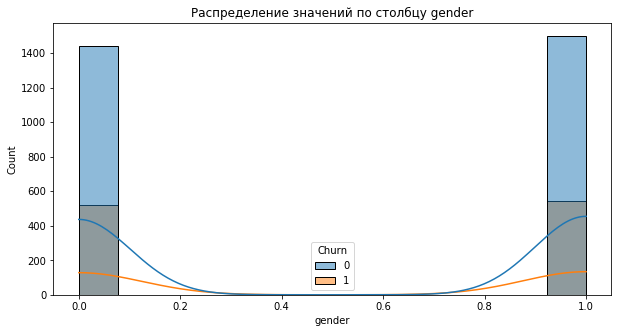

Описательные статистики по столбцу gender с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.510037,0.499984,0.0,0.0,1.0,1.0,1.0
1,1061.0,0.510839,0.500118,0.0,0.0,1.0,1.0,1.0


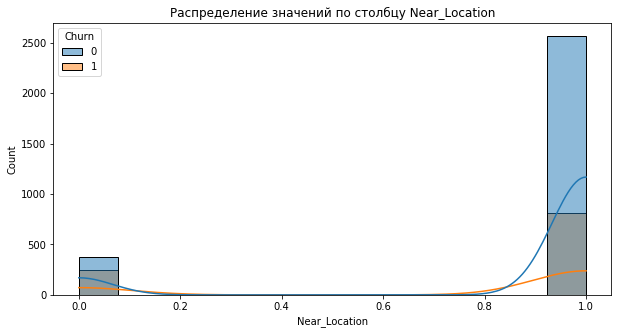

Описательные статистики по столбцу Near_Location с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.873086,0.332933,0.0,1.0,1.0,1.0,1.0
1,1061.0,0.768143,0.422217,0.0,1.0,1.0,1.0,1.0


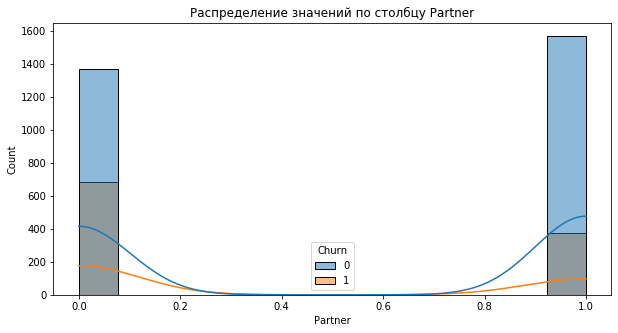

Описательные статистики по столбцу Partner с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.534195,0.498914,0.0,0.0,1.0,1.0,1.0
1,1061.0,0.355325,0.478837,0.0,0.0,0.0,1.0,1.0


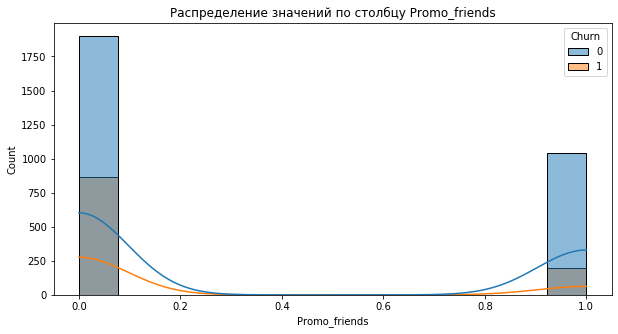

Описательные статистики по столбцу Promo_friends с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.353522,0.478144,0.0,0.0,0.0,1.0,1.0
1,1061.0,0.183789,0.387495,0.0,0.0,0.0,0.0,1.0


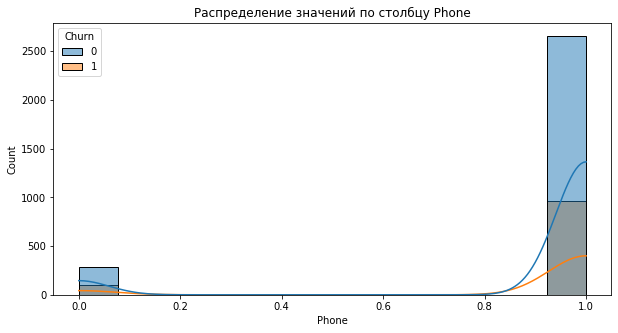

Описательные статистики по столбцу Phone с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.903709,0.295040,0.0,1.0,1.0,1.0,1.0
1,1061.0,0.902922,0.296204,0.0,1.0,1.0,1.0,1.0


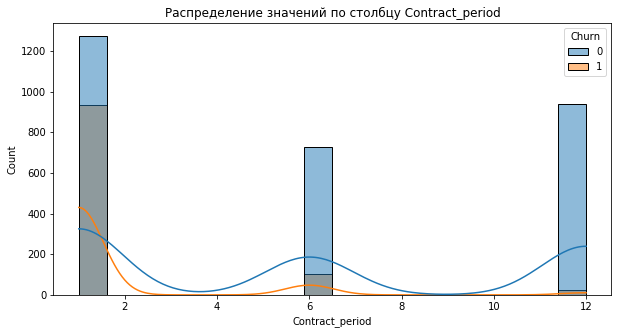

Описательные статистики по столбцу Contract_period с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,5.747193,4.716942,1.0,1.0,6.0,12.0,12.0
1,1061.0,1.728558,2.132371,1.0,1.0,1.0,1.0,12.0


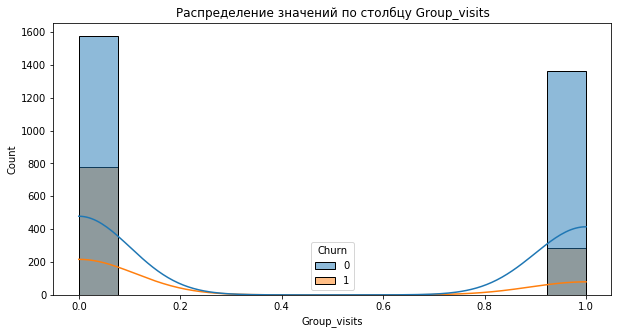

Описательные статистики по столбцу Group_visits с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.464103,0.498795,0.0,0.0,0.0,1.0,1.0
1,1061.0,0.268615,0.443448,0.0,0.0,0.0,1.0,1.0


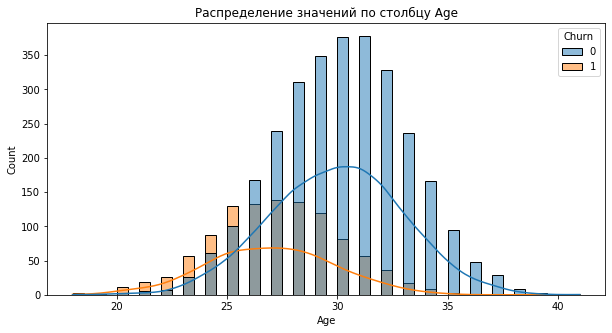

Описательные статистики по столбцу Age с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,29.976523,3.009933,19.0,28.0,30.0,32.0,41.0
1,1061.0,26.989632,2.895163,18.0,25.0,27.0,29.0,38.0


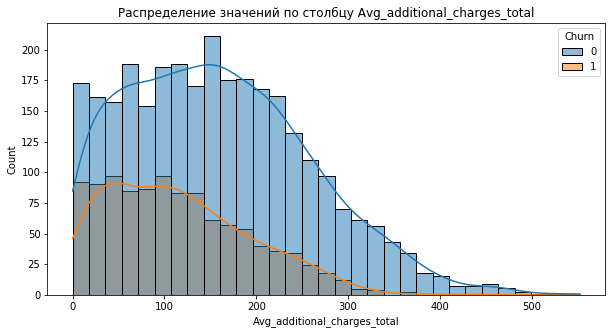

Описательные статистики по столбцу Avg_additional_charges_total с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.59074
1,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.53522


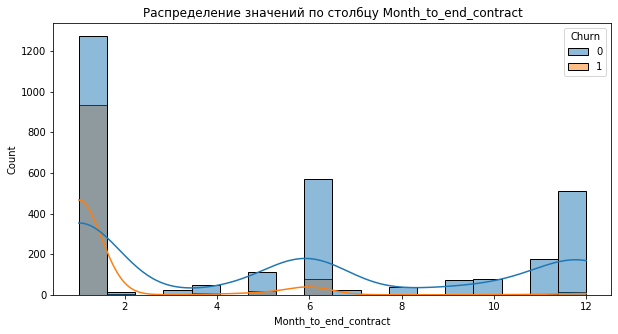

Описательные статистики по столбцу Month_to_end_contract с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,5.283089,4.363522,1.0,1.0,6.0,10.0,12.0
1,1061.0,1.662582,1.964593,1.0,1.0,1.0,1.0,12.0


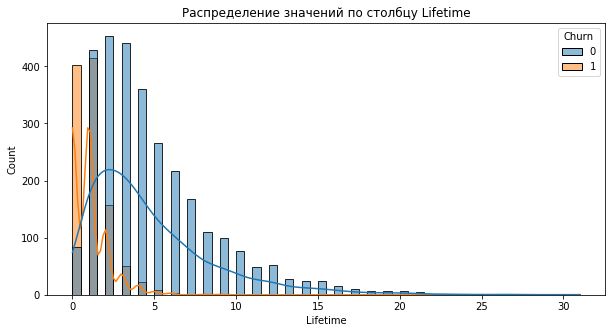

Описательные статистики по столбцу Lifetime с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,4.711807,3.874780,0.0,2.0,4.0,6.0,31.0
1,1061.0,0.990575,1.110799,0.0,0.0,1.0,1.0,9.0


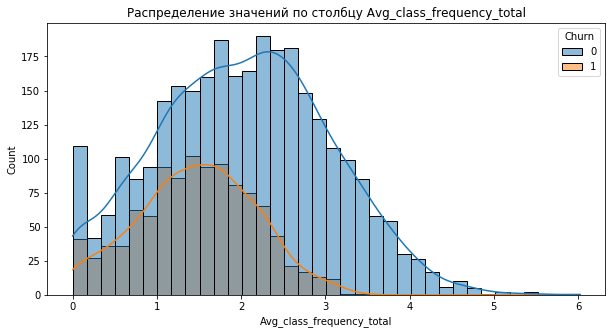

Описательные статистики по столбцу Avg_class_frequency_total с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,2.024876,1.016006,0.0,1.283137,2.043252,2.732944,6.023668
1,1061.0,1.474995,0.694705,0.0,1.010771,1.491187,1.956438,3.478646


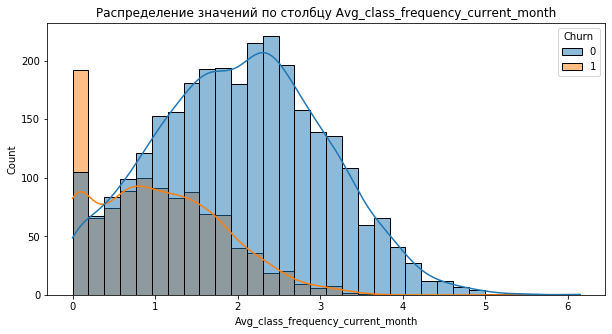

Описательные статистики по столбцу Avg_class_frequency_current_month с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,2.027882,1.018994,0.0,1.297021,2.046697,2.740648,6.146783
1,1061.0,1.044546,0.770237,0.0,0.421337,0.979445,1.588576,3.540271


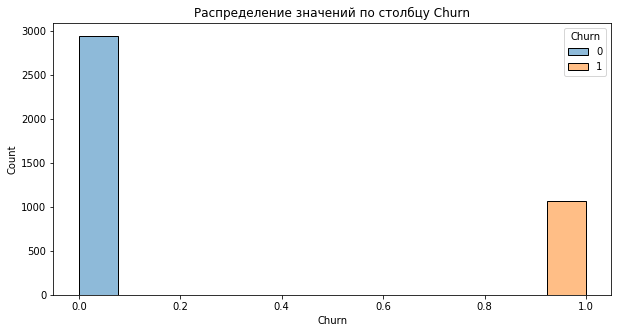

Описательные статистики по столбцу Churn с разбивкой по статусу: ушёл (1), не ушёл (0)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1061.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [8]:
for column in df.columns:
    fig, ax = plt.subplots(figsize=(10, 5))     
    sns.histplot(data=df, x=column, hue='Churn', kde=True)
    plt.title('Распределение значений по столбцу ' + column)
    plt.show()
    print('Описательные статистики по столбцу ' + column + ' с разбивкой по статусу: ушёл (1), не ушёл (0)')
    display(df.groupby('Churn')[column].describe())

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>
    
<s>Пару раз перезапускал, не помогло ☹️
    
Посмотри пожалуйста что не так.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Поменял установку модуля seaborn - должно заработать если установить его (код во второй строчке) + потом обновить весь запуск.: </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Кажется помогло 😊👍
    
---

Отличный способ визуализации, в том числе можно было бы построить наши графики с помощью метода `subplots`, например в 2 колонки, для нашего удоства в их изучении.
    
Тут можно посмотреть примеры. 
    
- `matplotlib`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html
- `plotly` : https://plotly.com/python/subplots/
    

</div>


Сигналы к тому, что КЛИЕНТ возможно уйдёт в следующем месяце: 
- Кол-во занятий в неделю - от 1 и меньше. Ушедшие клиенты в месяце до оттока занимались в среднем 1 раз в неделю, а те, кто остался - 2 раза в неделю.
- Посещает мало групповых занятий. Групповые занятия помогают сформировать лояльность к клубу. Ушёдшие клиенты реже занимались в групповых занятиях, чем те, кто остался. 
- Купил абонемент на 1 месяц. Те, кто ушёл в 88% случаев покупали абонемент на 1 месяц.
- Не является сотрудником компании партнёра или не пришёл по акции 'Приведи друга'. С друзьями и со скидками приятней заниматься, чем без них.

**Матрица корреляций**

In [9]:
# оценка корреляций признаков
df.corr().style.background_gradient(cmap='cividis_r')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1,0.00669923,-0.0104626,-0.00503327,-0.00854212,0.000502261,0.0178789,0.0138069,-0.00933444,-0.00128079,0.0135786,0.0146202,0.00915649,0.000707734
Near_Location,0.00669923,1,-0.00511943,0.210964,-0.0157632,0.150233,0.154728,0.0583578,0.0407612,0.143961,0.0709206,0.0431275,0.0626636,-0.128098
Partner,-0.0104626,-0.00511943,1,0.45196,0.00996961,0.306166,0.0227096,0.0474797,0.0229412,0.294632,0.0612294,0.0249379,0.0455611,-0.157986
Promo_friends,-0.00503327,0.210964,0.45196,1,0.00198159,0.244552,0.12017,0.0501133,0.0368977,0.239553,0.0727211,0.0280632,0.0537684,-0.162233
Phone,-0.00854212,-0.0157632,0.00996961,0.00198159,1,-0.00689326,-0.0100991,-0.0114032,0.00927943,-0.0111963,-0.0188012,0.00834047,0.0133749,-0.0011766
Contract_period,0.000502261,0.150233,0.306166,0.244552,-0.00689326,1,0.169991,0.138249,0.111445,0.973064,0.170725,0.0962111,0.159407,-0.389984
Group_visits,0.0178789,0.154728,0.0227096,0.12017,-0.0100991,0.169991,1,0.0809336,0.0320791,0.163703,0.0758528,0.0566948,0.0759233,-0.175325
Age,0.0138069,0.0583578,0.0474797,0.0501133,-0.0114032,0.138249,0.0809336,1,0.0802401,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.00933444,0.0407612,0.0229412,0.0368977,0.00927943,0.111445,0.0320791,0.0802401,1,0.113958,0.0790283,0.0444264,0.0795697,-0.198697
Month_to_end_contract,-0.00128079,0.143961,0.294632,0.239553,-0.0111963,0.973064,0.163703,0.134511,0.113958,1,0.161078,0.0853867,0.147605,-0.381393


Часть признаков показывают высокую корреляцию. Чтобы избавиться от мультиколлинеарности удалим коррелирующие признаки

In [10]:
# удалим коррелирующие между собой признаки
df = df.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Испарвил❤️👍🏾 </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что избавились от мультиколлениарности в наших данных 👍
    

</div>

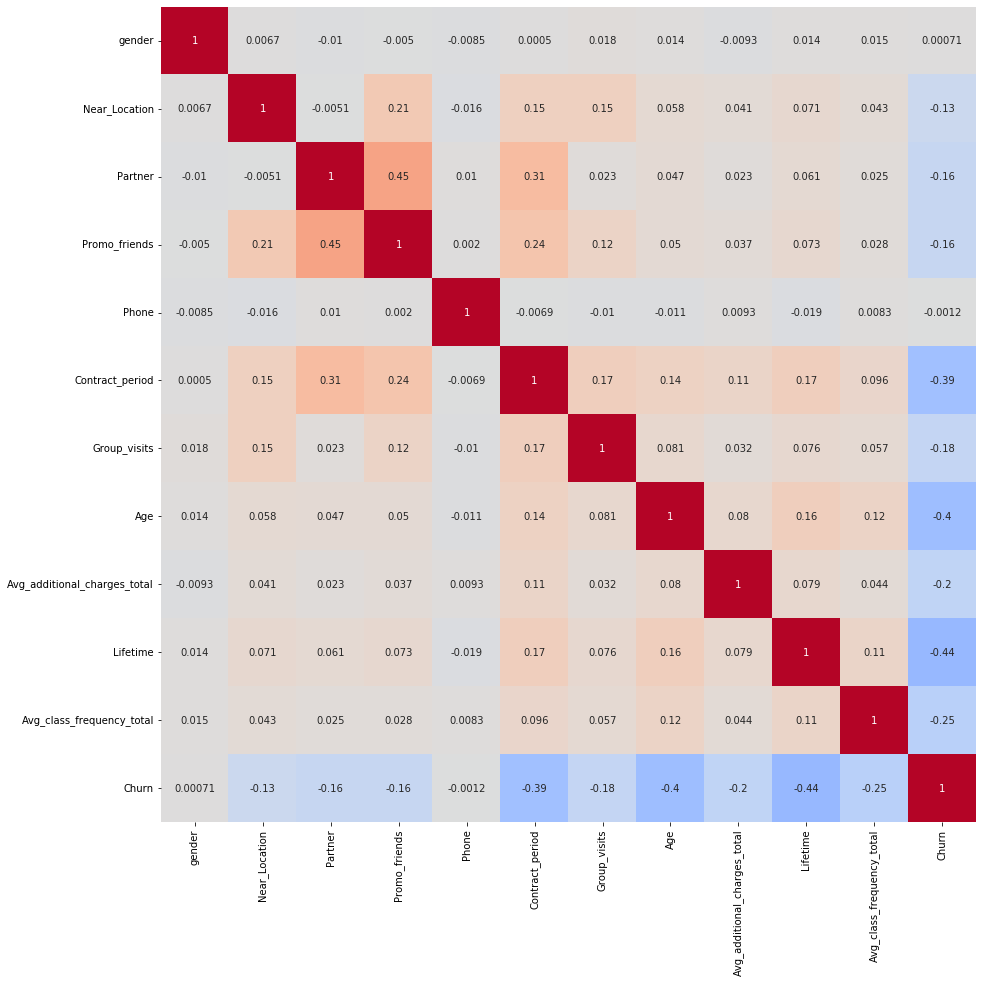

In [11]:
cm = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True,square=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', cbar=False)

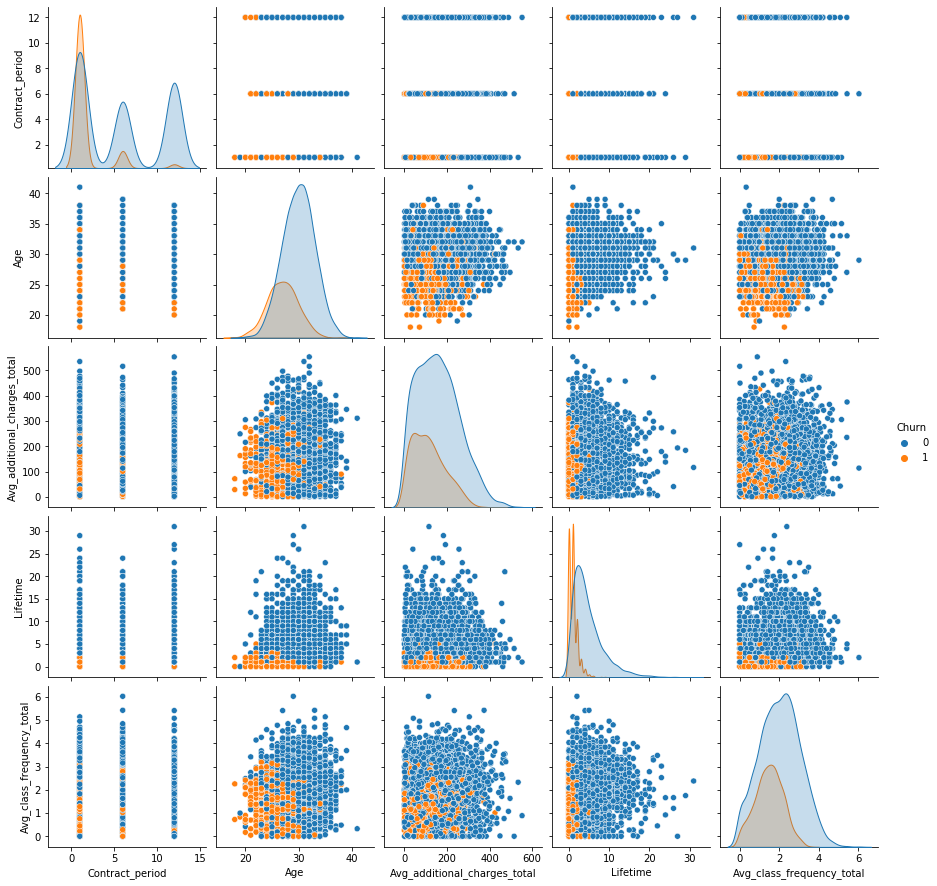

In [12]:
df_pair = df[['Contract_period', 'Age', 'Avg_additional_charges_total', 'Lifetime', 
              'Avg_class_frequency_total', 'Churn']]
sns.pairplot(data=df_pair, hue = 'Churn')

- Чем человек старше, тем выше вероятность, что он останется в фитнес-центре на следующий месяц. 
- Чем больше срок жизни клиента, тем выше вероятность, что он останется в фитнес-центре на следующий месяц. Cap
- Частота занятий у молодых людей не всегда связана с последующим оттоком: если те, кто занимался часто и всё равно ушли на следующий месяц.
- Частота занятий у взрослых людей связан с последующим оттоком: если взрослый (старше 30) часто занимается - он с высокой вероятностью продолжит заниматься в этом фитнес-центре на следующий месяц


## Модель прогнозирования оттока клиентов

Задания: 

Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
1. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
2. Обучите модель на train-выборке двумя способами: логистической регрессией,случайным лесом.
3. Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Примечания: Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

In [13]:
# разделяем df на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

# разделяем модель обучающую и валидационную выборку в соотношении 80 на 20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Размер обучающего датасета', X_train.shape)
print('Размер валидационного датасета', X_test.shape)

Размер обучающего датасета (3200, 11)
Размер валидационного датасета (800, 11)


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

    
В целом выборка разделена верно. 
Я бы рекомендовал бы ещё использовать атрибут `stratify` для целевой переменной. Он дает нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.
    
---
    
Хорошо, что используем параметр `random_state`, чтобы получать одни и те же результаты.
    
</div>

### Логическая регрессия для прогнозирования оттока клиентов

In [14]:
# зададим алгоритм для нашей модели
model_logic = LogisticRegression(solver='liblinear', random_state=0)

# обучм модель на обучающей выборке
model_logic.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
y_logic_predict = model_logic.predict(X_test)
y_logic_probabilities = model_logic.predict_proba(X_test)[:, 1]

**Отображение спрогнозированных весов для всех признаков**

In [15]:
lr_coef = np.abs(model_logic.coef_[0])
lr_df = (pd.DataFrame(list(zip(X.columns, lr_coef)),columns = ['Feature', 'Importance']))
lr_df.sort_values(by='Importance', ascending=False).style.background_gradient(cmap='cividis_r')

,Feature,Importance
9,Lifetime,0.965818
6,Group_visits,0.640821
10,Avg_class_frequency_total,0.613667
3,Promo_friends,0.458202
5,Contract_period,0.266428
7,Age,0.200437
0,gender,0.154482
4,Phone,0.0759971
1,Near_Location,0.00701135
8,Avg_additional_charges_total,0.0049082


**Расчёт метрик классификации для логической регрессии**

In [16]:
# рассчитаем долю правильных ответов
print('Accuracy for logistic regression: {:.2f}'.format(accuracy_score(y_test, y_logic_predict)))
print('Precision for logistic regression: {:.2f}'.format(precision_score(y_test, y_logic_predict)))
print('Recall for logistic regression: {:.2f}'.format(recall_score(y_test, y_logic_predict)))
print('F1 for logistic regression: {:.2f}'.format(f1_score(y_test, y_logic_predict)))
#Выясним, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC 
print('ROC_AUC for logistic regression: {:.2f}'.format(roc_auc_score(y_test, y_logic_probabilities)))

Accuracy for logistic regression: 0.88
Precision for logistic regression: 0.76
Recall for logistic regression: 0.77
F1 for logistic regression: 0.77
ROC_AUC for logistic regression: 0.95


### Случайный лес для прогнозирования оттока клиентов

**Обучение и прогноз значений с помощью модели Random Forest**

In [17]:
# обучение модели
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_probabilities = rf_model.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Отображение спрогнозированных весов для всех признаков**

In [18]:
importances = rf_model.feature_importances_
weight_rf = pd.DataFrame(list(zip(X.columns,importances)), columns=['feature', 'feature_weight'])
weight_rf.sort_values(by='feature_weight', ascending=False).style.background_gradient(cmap='cividis_r')

,feature,feature_weight
9,Lifetime,0.365329
10,Avg_class_frequency_total,0.154022
8,Avg_additional_charges_total,0.137964
7,Age,0.137612
5,Contract_period,0.102045
6,Group_visits,0.0235469
3,Promo_friends,0.0185518
1,Near_Location,0.0170816
0,gender,0.0165829
2,Partner,0.0163017


**Расчёт метрик классификации для случайного леса**

In [19]:
# рассчитаем долю правильных ответов
print('Accuracy for random forest: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision for random forest: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall for random forest: {:.2f}'.format(recall_score(y_test, y_pred_rf)))
print('F1 for random forest: {:.2f}'.format(f1_score(y_test, y_pred_rf)))
#Выясним, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC 
print('ROC_AUC for random forest: {:.2f}'.format(roc_auc_score(y_test, y_pred_rf_probabilities)))

Accuracy for random forest: 0.88
Precision for random forest: 0.77
Recall for random forest: 0.73
F1 for random forest: 0.75
ROC_AUC for random forest: 0.91


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

    
Кстати можно было бы добавить функцию для расчета наших метрик 👍
    
</div>

Финальный выбор по метрикам, обозначенным в начале исследования(accuracy, precision и recall)

Accuracy for logistic regression: 0.88 - 1
Accuracy for random forest: 0.88 - 1

Precision for logistic regression: 0.76 - 0
Precision for random forest: 0.77 - 1

Recall for logistic regression: 0.77 - 1
Recall for random forest: 0.73 - 0 

**Промежуточный результат:** 
- logistic regression: 2
- random forest: 2

Добавляем дополнительные метрики: 

F1 for logistic regression: 0.77 - 1
F1 for random forest: 0.75 - 0 

ROC_AUC for logistic regression: 0.95 - 1
ROC_AUC for random forest: 0.91 - 0

**Финальный счёт:**
- logistic regression: 4
- random forest: 2

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
   
Здорово, что посчитали метрику `F1`, которая как раз включает в себя основные параметры точности и полноты. 
    
В том числе рекомендую смотреть на метрику `ROC–AUC` с точки зрения визуализации. 
    
    
Ниже статья, в которой есть материалы про метрики и как их визуализировать.
    
https://habr.com/ru/company/ods/blog/328372/
    
---

Можно также попробовать и сравнить параметр `C` у логистической регрессии. У случайного леса количество деревьев (`n_estimators`) и максимальную глубину дерева (`max_depth`), чтобы осуществить поиск лучшей модели.
    
---
    
Кстати для автоматического перебора гиперпараметров мы можем использовать готовый метод `GreadSearchCV` в библиотеке `sklearn`. 
    
</div>

## Кластеризация клиентов

Задания: 
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
1. Стандартизируйте данные.
2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов.
4. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
6. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

**Стандартизация данных**

In [20]:
df_cluster = df.drop('Churn', axis=1)
scaler = StandardScaler()
X_sc = scaler.fit_transform(df_cluster)

**Матрица расстояний**

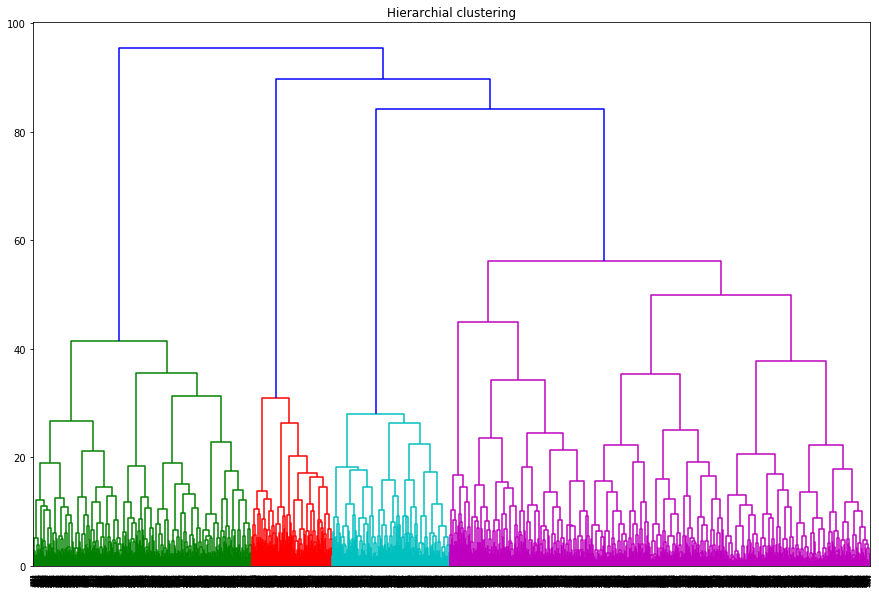

In [21]:
linked = linkage(X_sc, method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

Предложенное оптимальное число кластеров 4 — четыре разных цветов на графике. Далее в исследовании будем использовать 4 кластера. ИМХО

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Отлично 👍

В том числе чтобы определить количество кластеров можно использовать метод локтя. 
    
Ниже статья с двумя методами, которые можно в том числе использовать для определения количества кластеров.
    
https://habr.com/ru/company/jetinfosystems/blog/467745/
    
</div>

**Кластеризация методом K-means**

In [22]:
km = KMeans(n_clusters = 4, random_state=0) # задаём число кластеров
labels = km.fit_predict(X_sc) # применяем алгоритм к стандартизированным данным и формируем вектор кластер

In [23]:
# сохраняем метки класса в поле нашего датасета
df['cluster'] = labels
df['cluster'].value_counts()

0    1809
1    1244
2     561
3     386
Name: cluster, dtype: int64

**Метрици кластеризации**

In [24]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.17


Значение метрики оказалось не очень высоким.

**Средние значения признаков для кластеров**

In [25]:
df.groupby('cluster').agg('mean').T.style.background_gradient(cmap='cividis_r', axis=1)

cluster,0,1,2,3
gender,0.524599,0.490354,0.499109,0.523316
Near_Location,1,0.995981,0,0.862694
Partner,0.176893,0.941318,0.488414,0.471503
Promo_friends,0.0619127,0.772508,0.0766488,0.305699
Phone,1,1,1,0
Contract_period,3.03593,7.78778,3.03209,4.7772
Group_visits,0.39414,0.513666,0.235294,0.427461
Age,28.974,29.6632,28.7219,29.2979
Avg_additional_charges_total,143.391,157.2,137.54,144.208
Lifetime,3.33444,4.52492,3.06061,3.94041


- Кластер №0. Портрет: живёт или работает рядом с фитнес-центром. Не является сотрудником компании партнёра и не пришёл по акции "Приведи друга". В среднем абонемент действует на 3 месяца. Срок жизни клиента - тоже 3 месяца. С 33% вероятностью уйдёт в следующем месяце. Здесь нужно действовать быстро: у вас есть 2 месяца, чтобы убедить его остаться: групповые занятия, скидки и другие программы лояльности. Иначе - каждый третий уйдёт. 
- Кластер №1. Потрет: живёт или работает рядом с фитнес-центром. Является сотрудником компании партнёра или пришёл по акции "Приведи друга". Текущий действующий абонемент в среднем на 7 месяцев. Средний срок жизни - 4,5 месяца. Лоялен к клубу. Только 10% пользователей из данного сегмента уходят на следующий месяц. Если пользователь попал в этот сегмент, то его нужно любить и обожать. Он пока от вас не уходит. 
- Кластер №2. Потрет: не живёт рядом с фитнес центром. Не пришёл по акции "Приведи друга". Не посещает групповые занятия. С 50% вероятностью является сотрудником компании-партнёра. То есть: компания-партнёр дала ему скидку, он по этой скидке пришёл в ваш фитнес-центр , но живёт он не рядом - поэтому одними скидками сыт не будет. С 40% вероятностью уйдёт на следующий месяц. Если вы, конечно, не переведёте его в фитнес-центром рядом с домом или работой. 
- Кластер №3. Потрет: живёт или работает рядом с фитнес-центром. С 50% вероятностью является сотрудником компании-патрнёра. Не указал наличия контактного телефона. В среднем текущий абонемент на 4,7 месяца. С 26% вероятностью уйдёт на следующий месяц.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Супер, теперь у нас есть портреты наших пользователей 👍
    
</div>

У меня вызывает сомнение признак телефон. Модель могла переобучиться по этому показателю и выделить конкретный сегмент по пользователям, которые не указали контактный номер телефона. Попробуем обучить модель заново, но уже без поля "Телефон"

## 2-ая попытка кластеризации клиентов без поля 'phone'

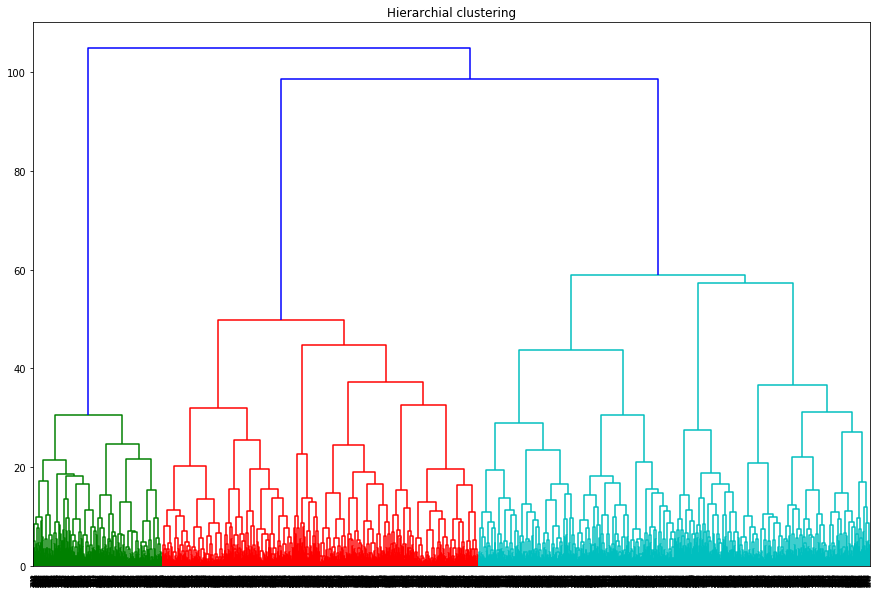

In [26]:
# разделяем df на признаки (матрица X) и целевую переменную (y)
df_without_phone = df.drop('Phone', axis=1)

df_cluster = df_without_phone.drop('Churn', axis=1)
scaler = StandardScaler()
X_sc = scaler.fit_transform(df_cluster)

linked = linkage(X_sc, method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

Предложенное оптимальное число кластеров 3 — три разных цвета на графике.

In [27]:
km = KMeans(n_clusters = 3, random_state=0) # задаём число кластеров
labels = km.fit_predict(X_sc) # применяем алгоритм к стандартизированным данным и формируем вектор кластер

In [28]:
# сохраняем метки класса в поле нашего датасета
df_without_phone['cluster'] = labels
df_without_phone['cluster'].value_counts()

1    1809
0    1417
2     774
Name: cluster, dtype: int64

In [29]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.19


Значение метрики оказалось выше предыдущего. Ну потому что число кластеров стало меньше. Cap

In [30]:
df_without_phone.groupby('cluster').agg('mean').T.style.background_gradient(cmap='cividis_r', axis=1)

cluster,0,1,2
gender,0.493296,0.524599,0.507752
Near_Location,0.996471,1,0.206718
Partner,0.920254,0.176893,0.417313
Promo_friends,0.758645,0.0619127,0.0607235
Contract_period,7.73677,3.03593,2.93282
Group_visits,0.525053,0.39414,0.248062
Age,29.693,28.974,28.7442
Avg_additional_charges_total,157.054,143.391,136.739
Lifetime,4.55399,3.33444,3.11886
Avg_class_frequency_total,1.97476,1.84895,1.77402


Без поля телефон сформировалось 3 ярких сегмента:
- Лояльные клиенты: много посещают, покупают абонементы на длительный срок, являются сотрудниками компании-партнёра. С 10% вероятностью уйдёт на следующий месяц
- Те, кто живёт рядом, но не являтся сотрудником компании партнёра и не пришёл по акции 'Приведи друга'. Те у кого нет СКИДКИ и нет ДРУЗЕЙ. С 33% вероятностью он уйдёт в следующем месяце. Тут два варианта: найти ему друзей в клубе или предоставить какую-нибудь скидку. 
- Те, кто не живёт рядом с фитнес-центром и не пришёл по акции 'Приведи друга'. Это самый отточный клиент. С 40% вероятностью он уйдёт. Нужно срочно искать ему новый клуб вашей сети рядом с домом или работей.

**Распределение признаков для рассчитанных кластеров по всем полям**

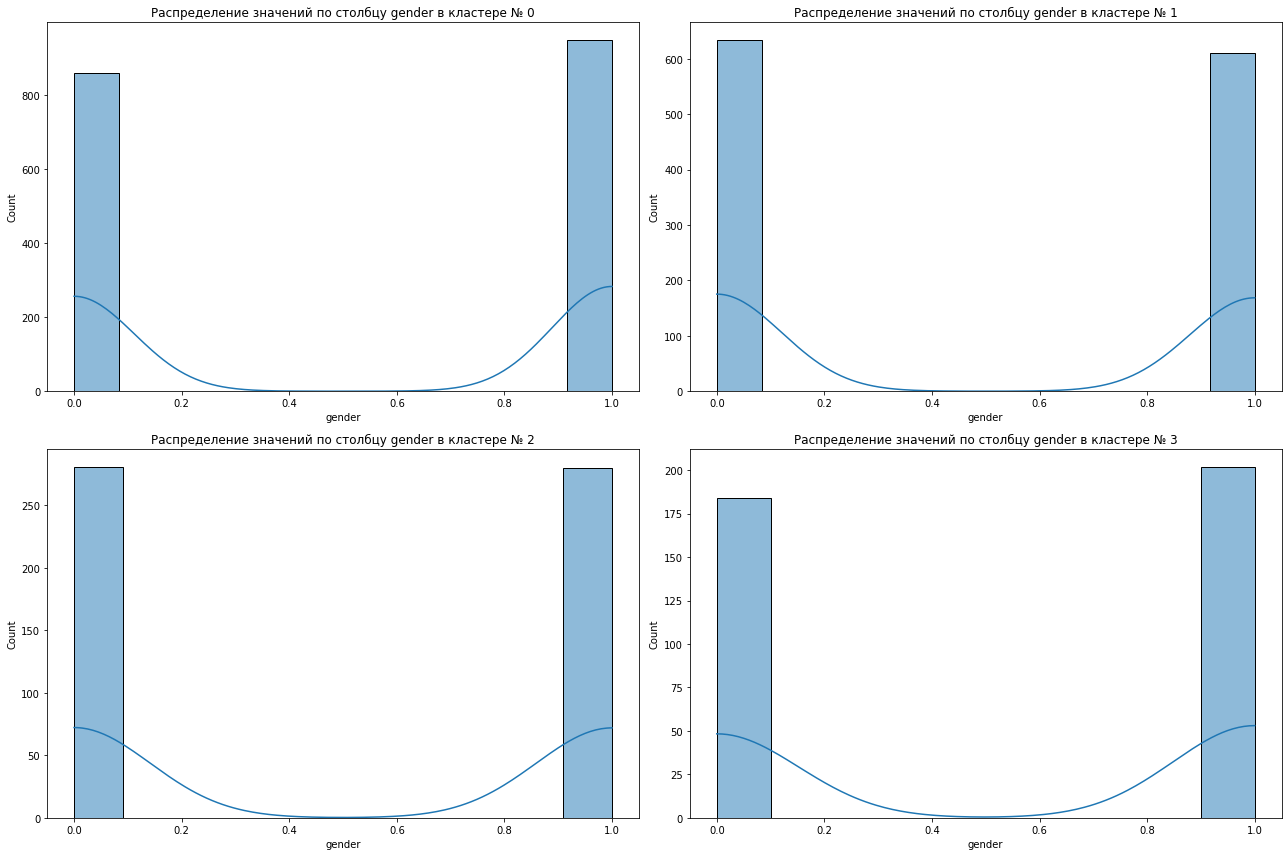

Описательные статистики по столбцу gender с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.524599,0.499533,0.0,0.0,1.0,1.0,1.0
1,1244.0,0.490354,0.500108,0.0,0.0,0.0,1.0,1.0
2,561.0,0.499109,0.500445,0.0,0.0,0.0,1.0,1.0
3,386.0,0.523316,0.500104,0.0,0.0,1.0,1.0,1.0


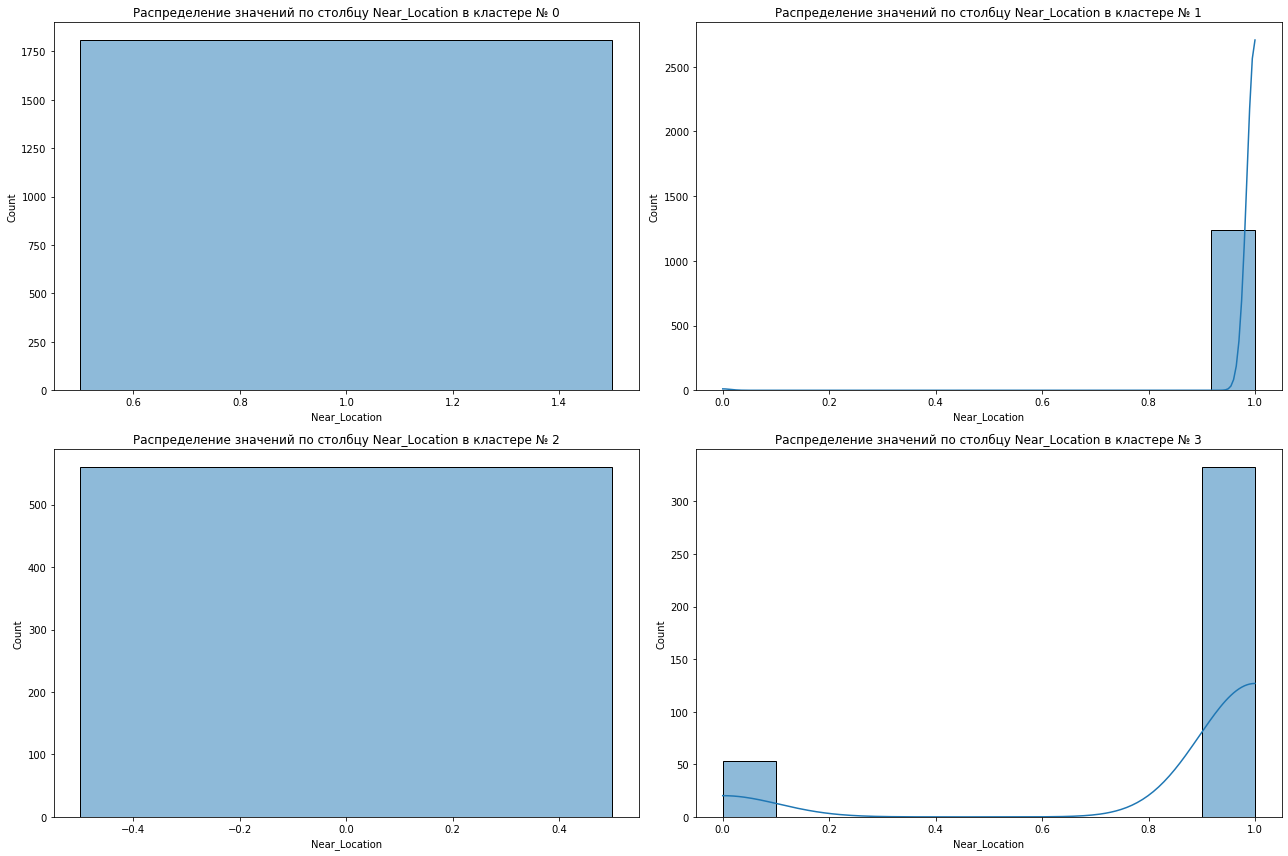

Описательные статистики по столбцу Near_Location с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,1244.0,0.995981,0.063296,0.0,1.0,1.0,1.0,1.0
2,561.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,386.0,0.862694,0.344616,0.0,1.0,1.0,1.0,1.0


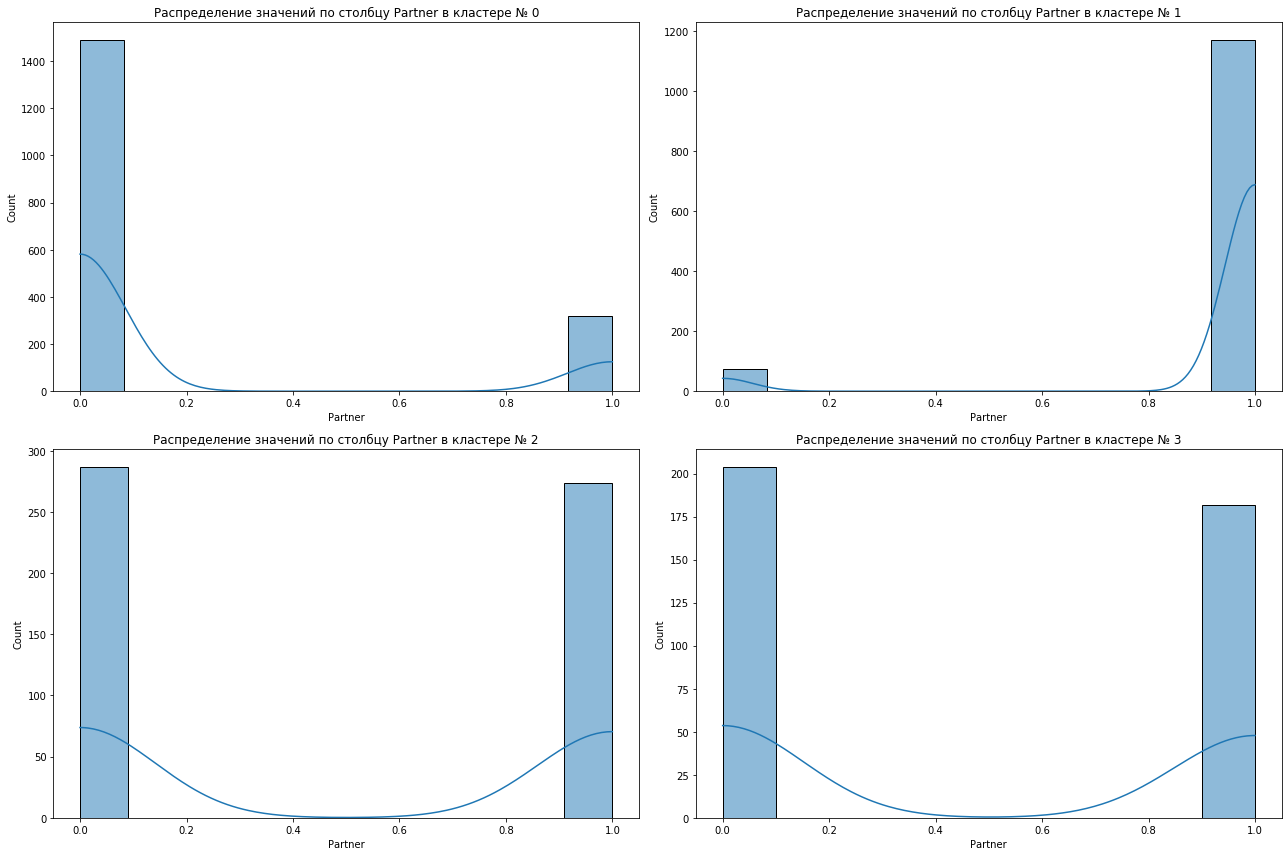

Описательные статистики по столбцу Partner с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.176893,0.381684,0.0,0.0,0.0,0.0,1.0
1,1244.0,0.941318,0.235122,0.0,1.0,1.0,1.0,1.0
2,561.0,0.488414,0.500312,0.0,0.0,0.0,1.0,1.0
3,386.0,0.471503,0.499835,0.0,0.0,0.0,1.0,1.0


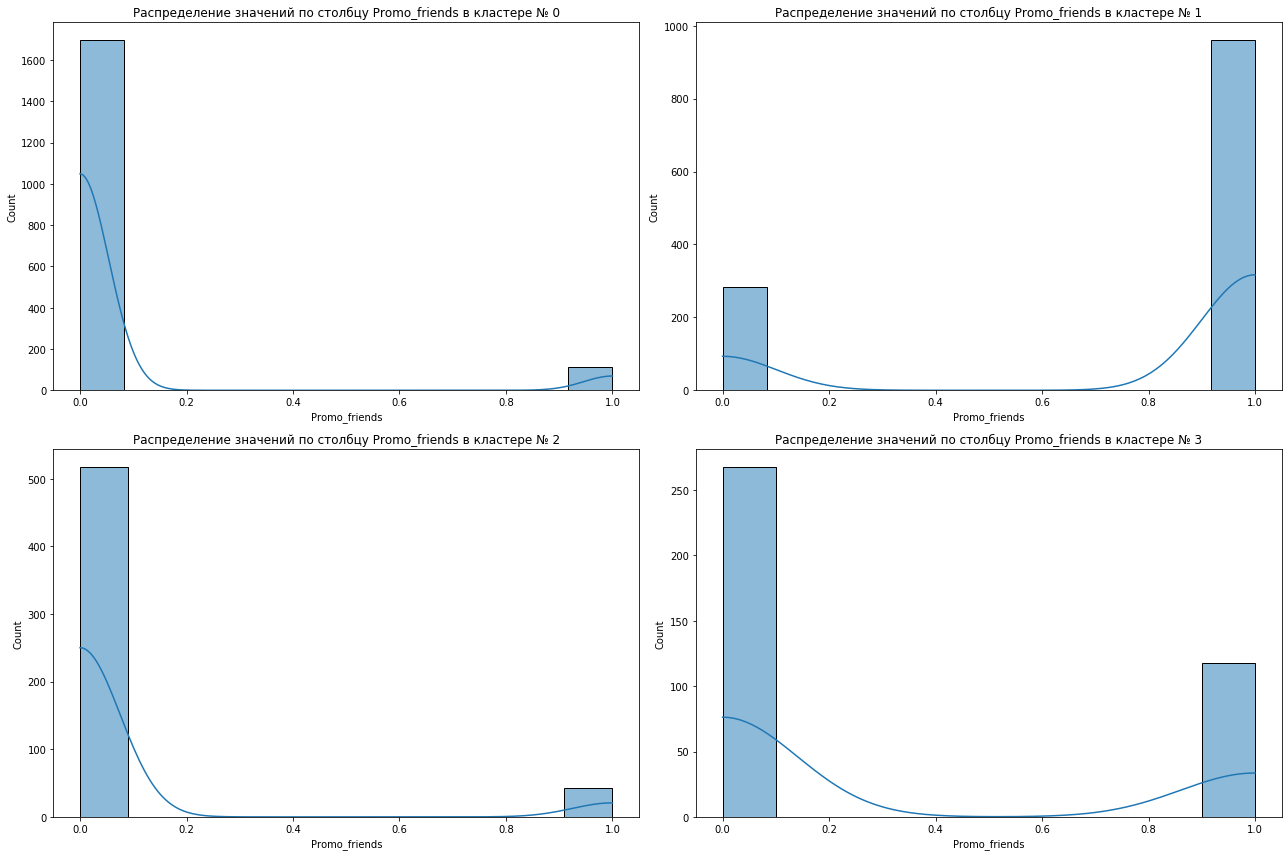

Описательные статистики по столбцу Promo_friends с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.061913,0.241063,0.0,0.0,0.0,0.0,1.0
1,1244.0,0.772508,0.419381,0.0,1.0,1.0,1.0,1.0
2,561.0,0.076649,0.266271,0.0,0.0,0.0,0.0,1.0
3,386.0,0.305699,0.461301,0.0,0.0,0.0,1.0,1.0


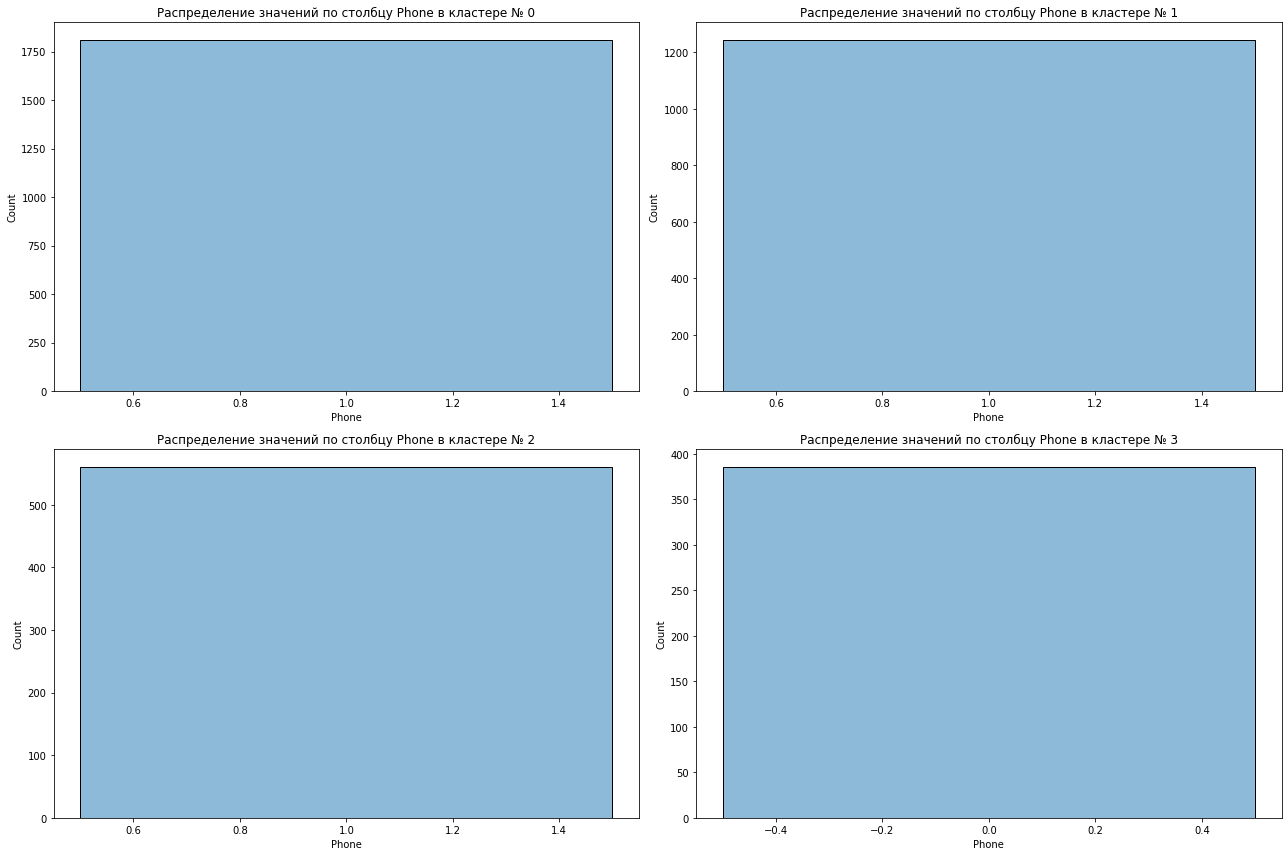

Описательные статистики по столбцу Phone с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1244.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,561.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


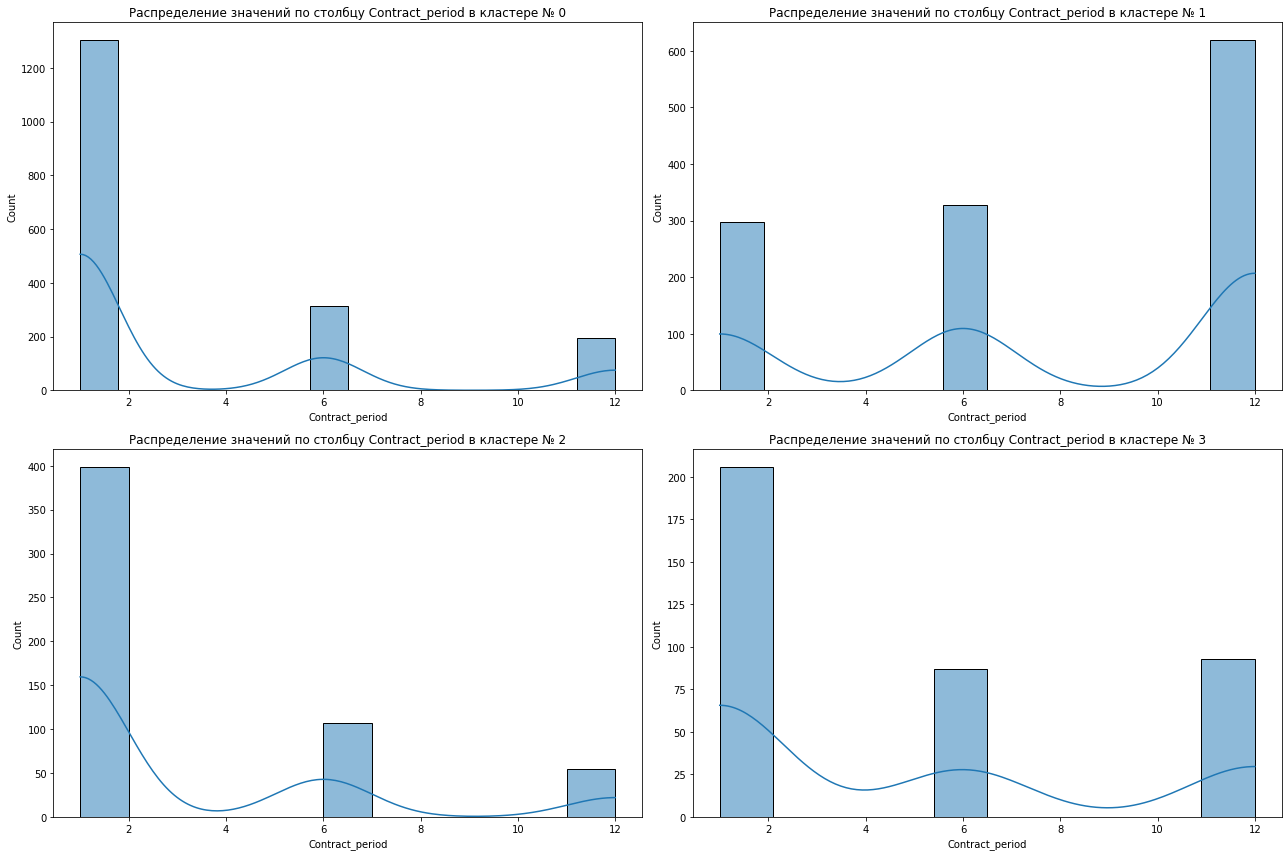

Описательные статистики по столбцу Contract_period с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,3.035931,3.617089,1.0,1.0,1.0,6.0,12.0
1,1244.0,7.787781,4.552189,1.0,6.0,6.0,12.0,12.0
2,561.0,3.032086,3.538922,1.0,1.0,1.0,6.0,12.0
3,386.0,4.777202,4.535814,1.0,1.0,1.0,6.0,12.0


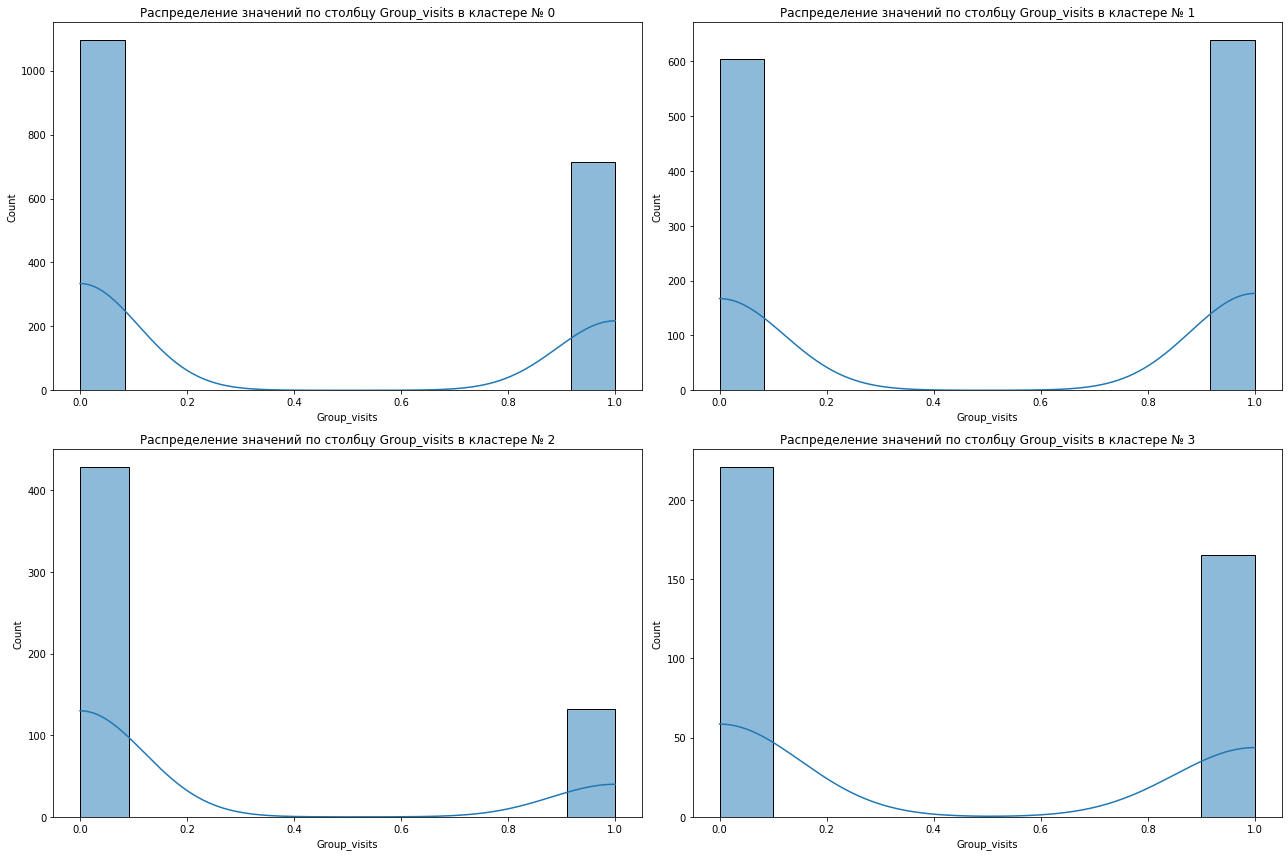

Описательные статистики по столбцу Group_visits с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.394140,0.488800,0.0,0.0,0.0,1.0,1.0
1,1244.0,0.513666,0.500014,0.0,0.0,1.0,1.0,1.0
2,561.0,0.235294,0.424561,0.0,0.0,0.0,0.0,1.0
3,386.0,0.427461,0.495352,0.0,0.0,0.0,1.0,1.0


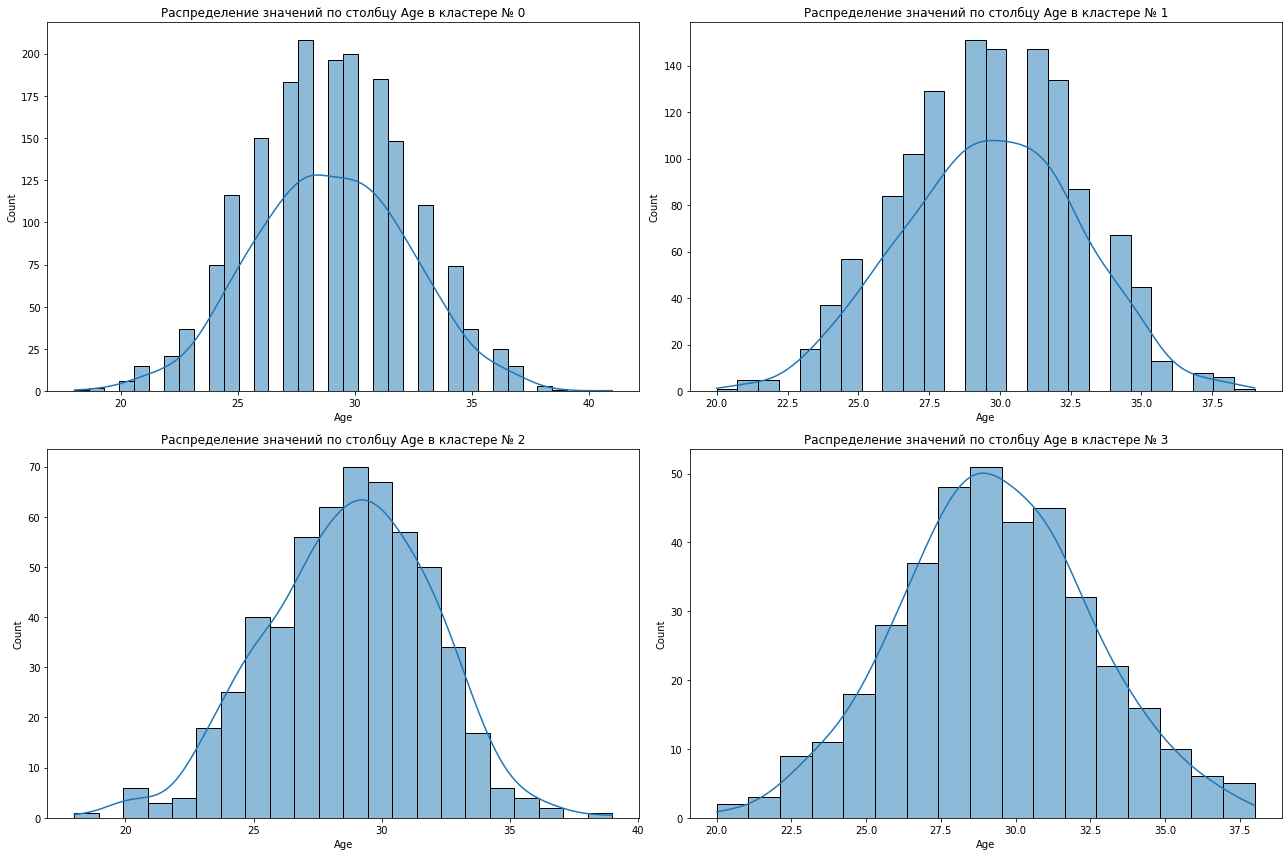

Описательные статистики по столбцу Age с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,28.974019,3.328758,18.0,27.0,29.0,31.0,41.0
1,1244.0,29.663183,3.138000,20.0,28.0,30.0,32.0,39.0
2,561.0,28.721925,3.231160,18.0,27.0,29.0,31.0,39.0
3,386.0,29.297927,3.160938,20.0,27.0,29.0,31.0,38.0


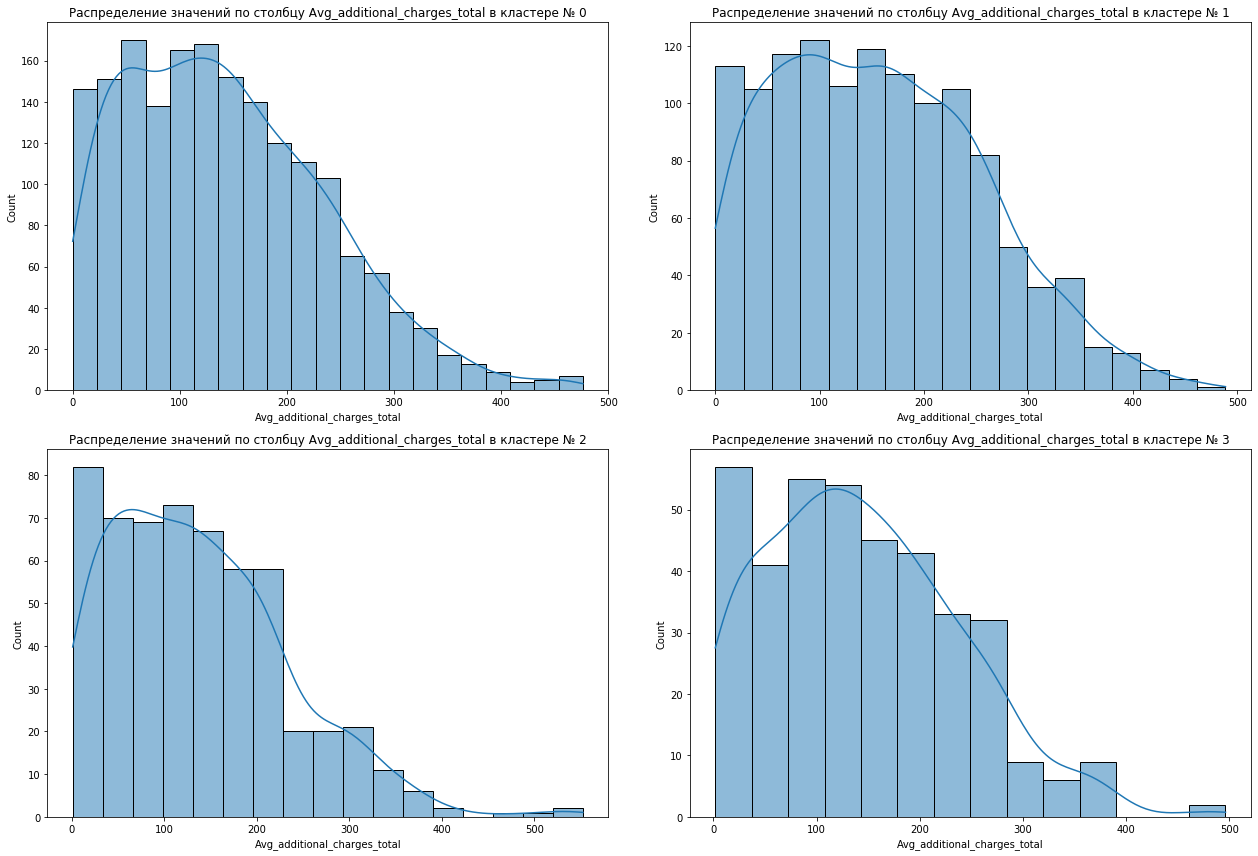

Описательные статистики по столбцу Avg_additional_charges_total с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,143.390526,93.940550,0.171862,66.419500,132.305823,205.631751,476.432655
1,1244.0,157.200280,99.514329,0.148205,75.506477,149.769303,227.840298,488.708175
2,561.0,137.540009,96.791242,0.972250,59.202259,124.323490,196.660938,552.590740
3,386.0,144.208179,94.124743,1.767654,71.090935,137.016545,204.014435,496.172222


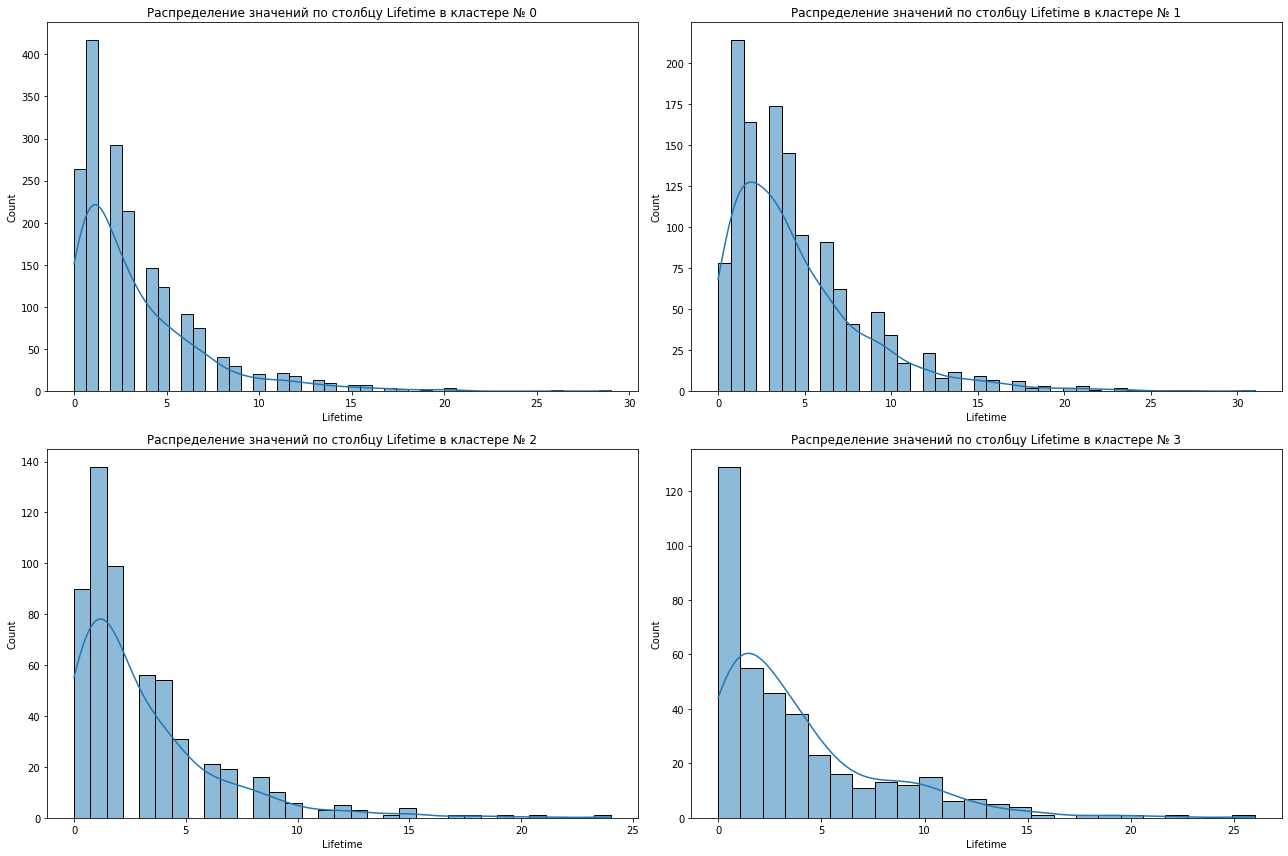

Описательные статистики по столбцу Lifetime с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,3.334439,3.501001,0.0,1.0,2.0,5.0,29.0
1,1244.0,4.524920,4.028481,0.0,2.0,3.0,6.0,31.0
2,561.0,3.060606,3.332722,0.0,1.0,2.0,4.0,24.0
3,386.0,3.940415,4.052778,0.0,1.0,3.0,5.0,26.0


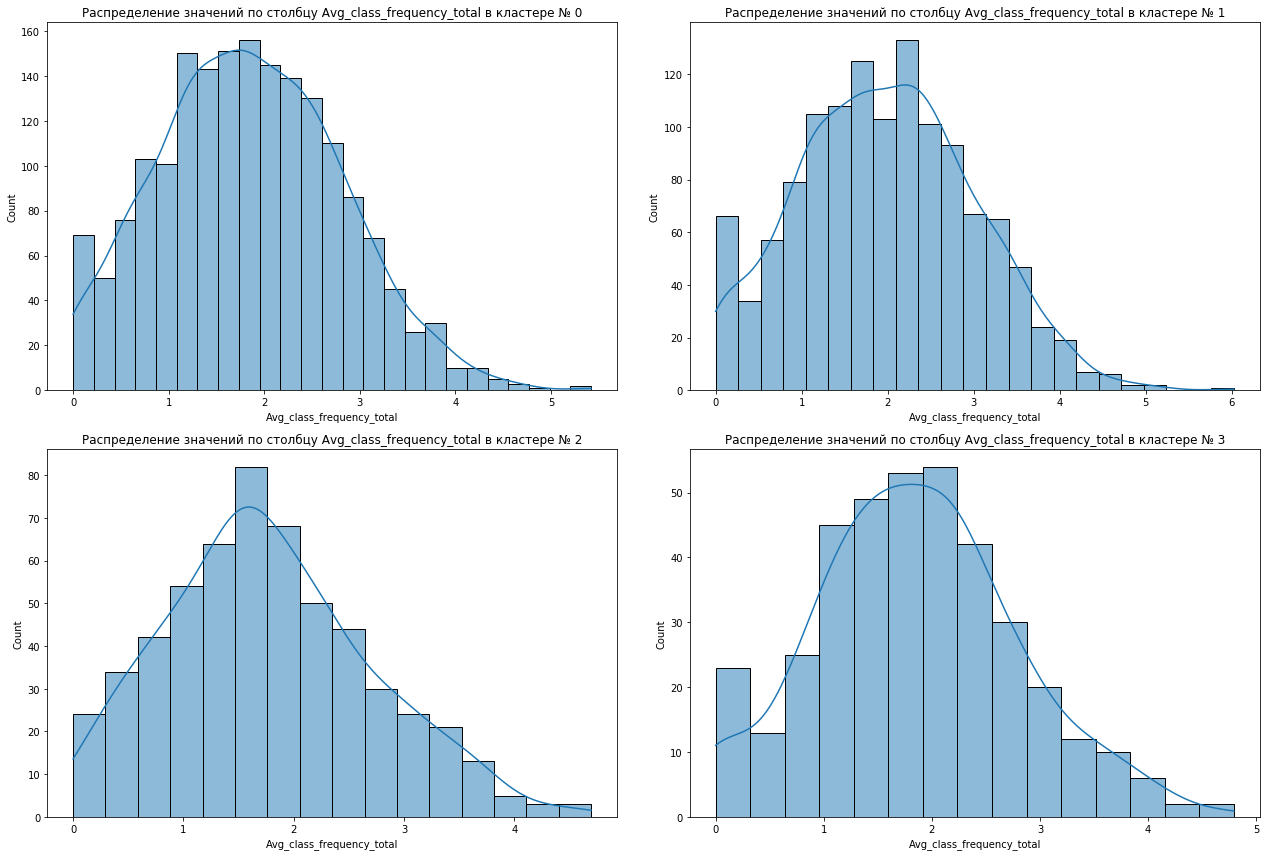

Описательные статистики по столбцу Avg_class_frequency_total с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,1.848948,0.951349,0.0,1.171125,1.818105,2.503552,5.421898
1,1244.0,1.979426,1.021238,0.0,1.214932,1.958450,2.670556,6.023668
2,561.0,1.770413,0.934093,0.0,1.110288,1.671651,2.365245,4.698029
3,386.0,1.854211,0.936601,0.0,1.210427,1.824012,2.414739,4.793780


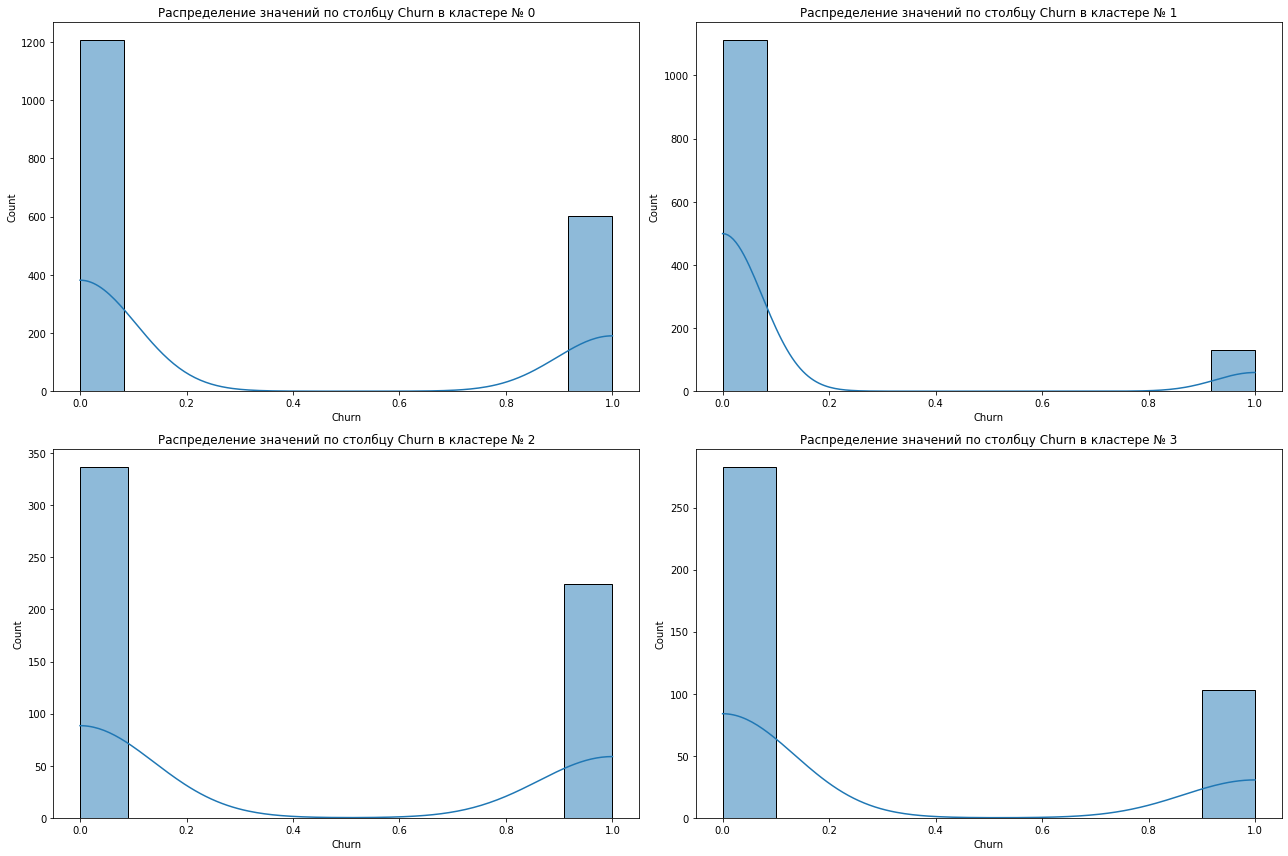

Описательные статистики по столбцу Churn с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.332781,0.471339,0.0,0.0,0.0,1.0,1.0
1,1244.0,0.106109,0.308101,0.0,0.0,0.0,0.0,1.0
2,561.0,0.399287,0.490189,0.0,0.0,0.0,1.0,1.0
3,386.0,0.266839,0.442882,0.0,0.0,0.0,1.0,1.0


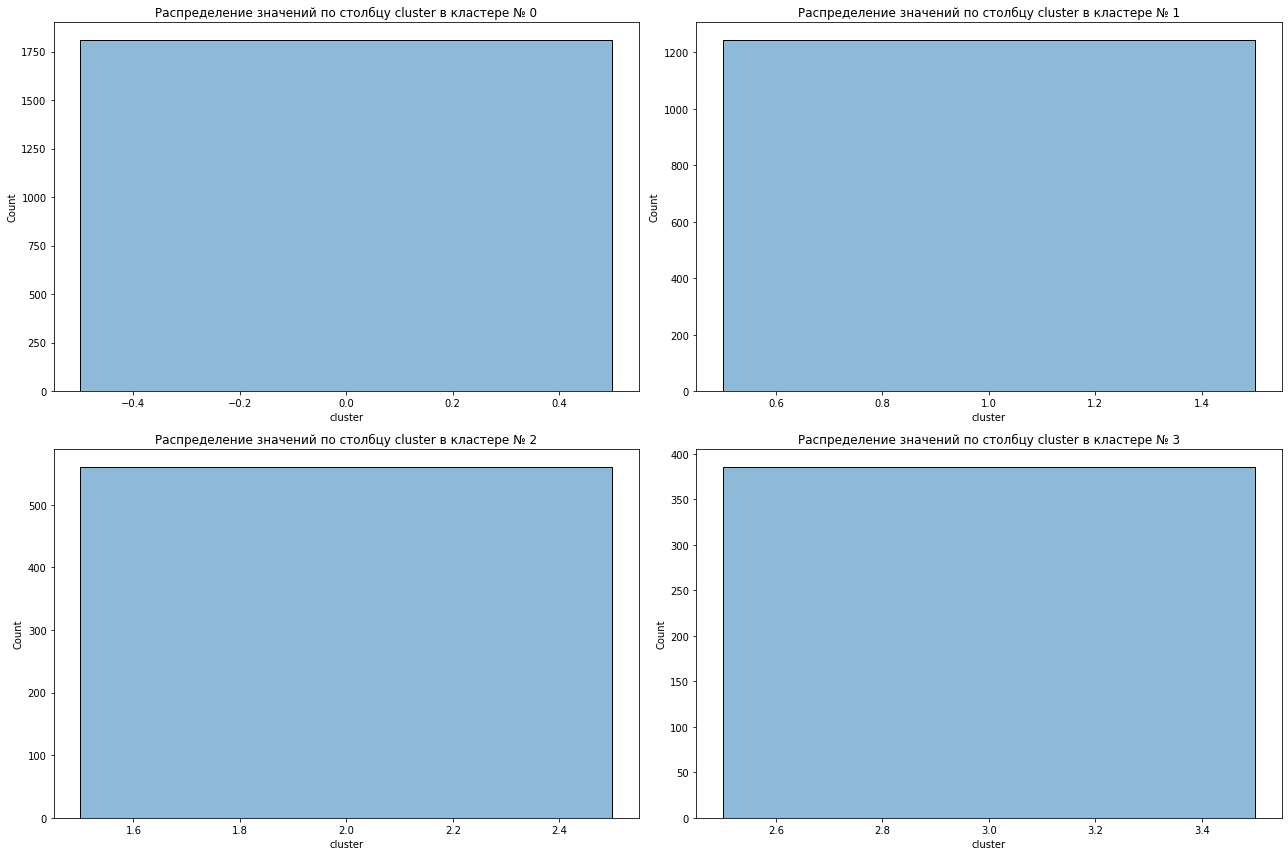

Описательные статистики по столбцу cluster с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1244.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,561.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,386.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


In [31]:
cluster_0 = df.loc[df['cluster'] == 0]
cluster_1 = df.loc[df['cluster'] == 1]
cluster_2 = df.loc[df['cluster'] == 2]
cluster_3 = df.loc[df['cluster'] == 3]

for column in df.columns:
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))                        
    sns.histplot(data=cluster_0, x=column, kde=True, ax=ax[0,0]) 
    sns.histplot(data=cluster_1, x=column, kde=True, ax=ax[0,1])
    sns.histplot(data=cluster_2, x=column, kde=True, ax=ax[1,0])             
    sns.histplot(data=cluster_3, x=column, kde=True, ax=ax[1,1])
    ax[0,0].set_title('Распределение значений по столбцу ' + column + ' в кластере № 0')
    ax[0,1].set_title('Распределение значений по столбцу ' + column + ' в кластере № 1')
    ax[1,0].set_title('Распределение значений по столбцу ' + column + ' в кластере № 2')
    ax[1,1].set_title('Распределение значений по столбцу ' + column + ' в кластере № 3')
    plt.tight_layout()
    plt.show()
    print('Описательные статистики по столбцу ' + column + ' с разбивкой по классам')
    display(df.groupby('cluster')[column].describe())

**Распределение признаков для рассчитанных кластеров №2 (без признака 'Phone')**

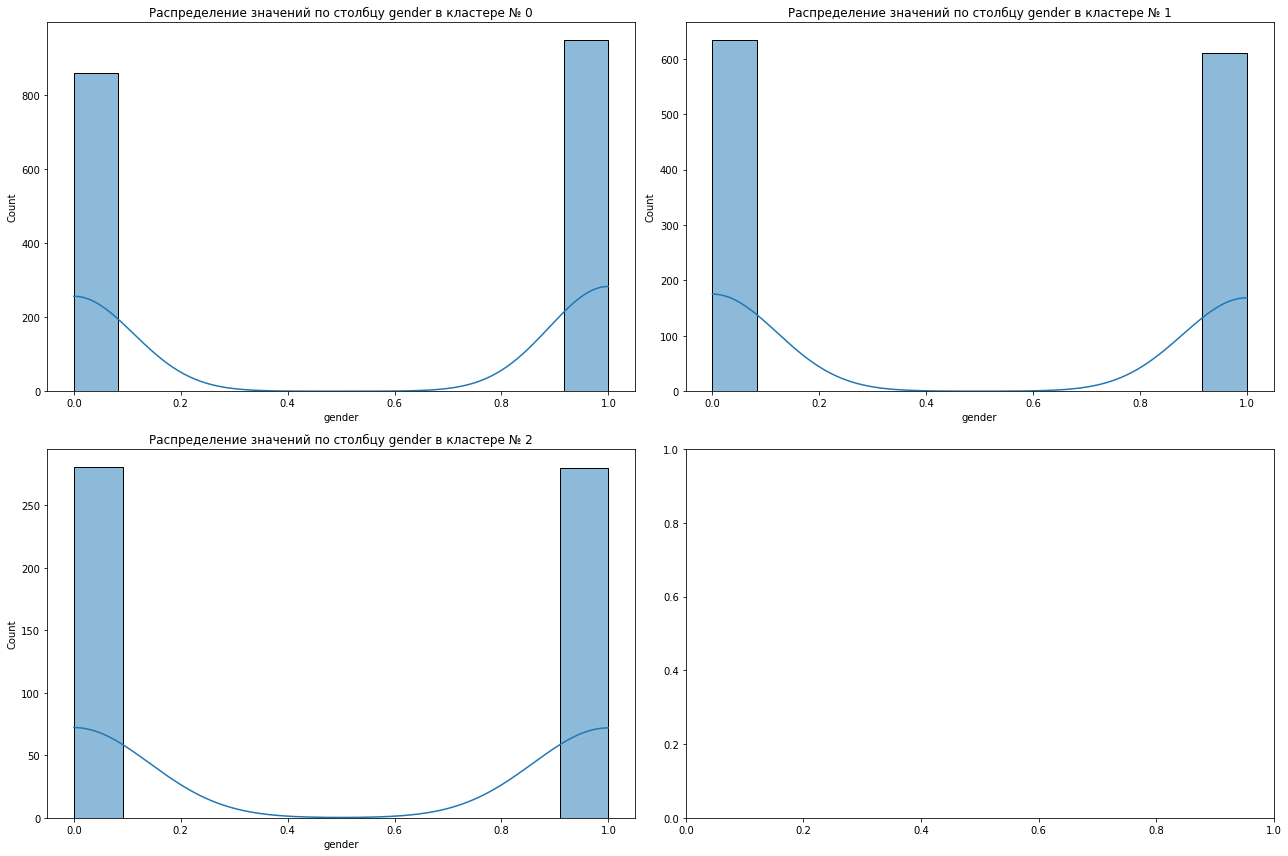

Описательные статистики по столбцу gender с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.524599,0.499533,0.0,0.0,1.0,1.0,1.0
1,1244.0,0.490354,0.500108,0.0,0.0,0.0,1.0,1.0
2,561.0,0.499109,0.500445,0.0,0.0,0.0,1.0,1.0
3,386.0,0.523316,0.500104,0.0,0.0,1.0,1.0,1.0


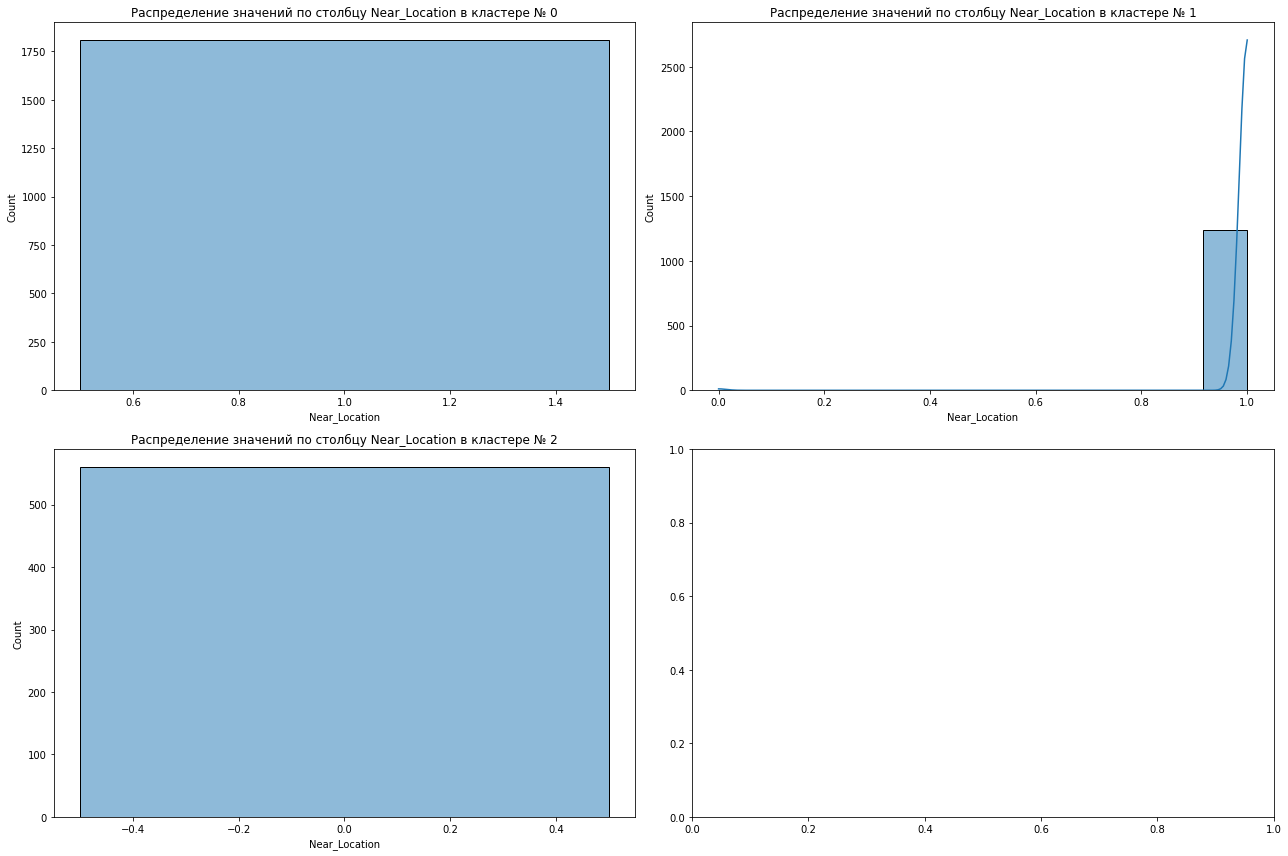

Описательные статистики по столбцу Near_Location с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,1244.0,0.995981,0.063296,0.0,1.0,1.0,1.0,1.0
2,561.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,386.0,0.862694,0.344616,0.0,1.0,1.0,1.0,1.0


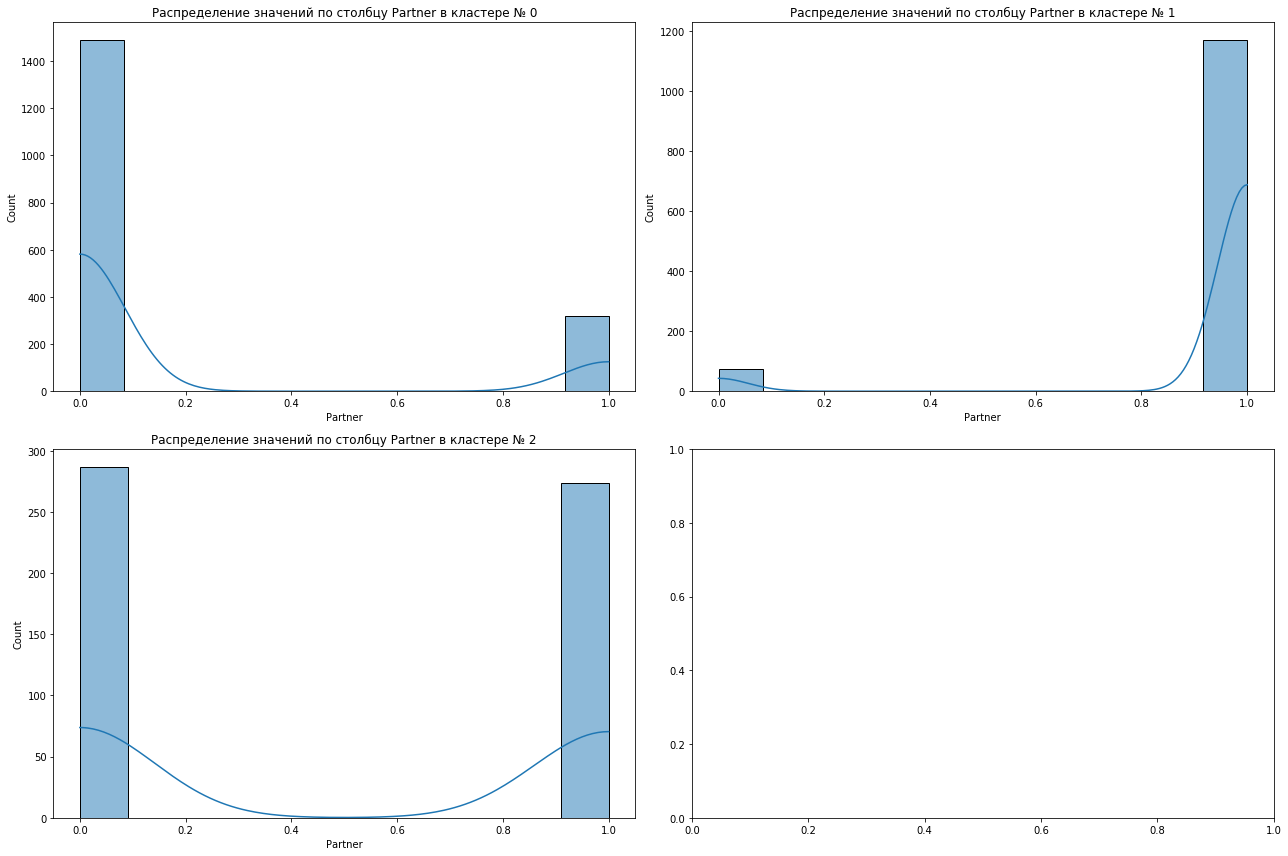

Описательные статистики по столбцу Partner с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.176893,0.381684,0.0,0.0,0.0,0.0,1.0
1,1244.0,0.941318,0.235122,0.0,1.0,1.0,1.0,1.0
2,561.0,0.488414,0.500312,0.0,0.0,0.0,1.0,1.0
3,386.0,0.471503,0.499835,0.0,0.0,0.0,1.0,1.0


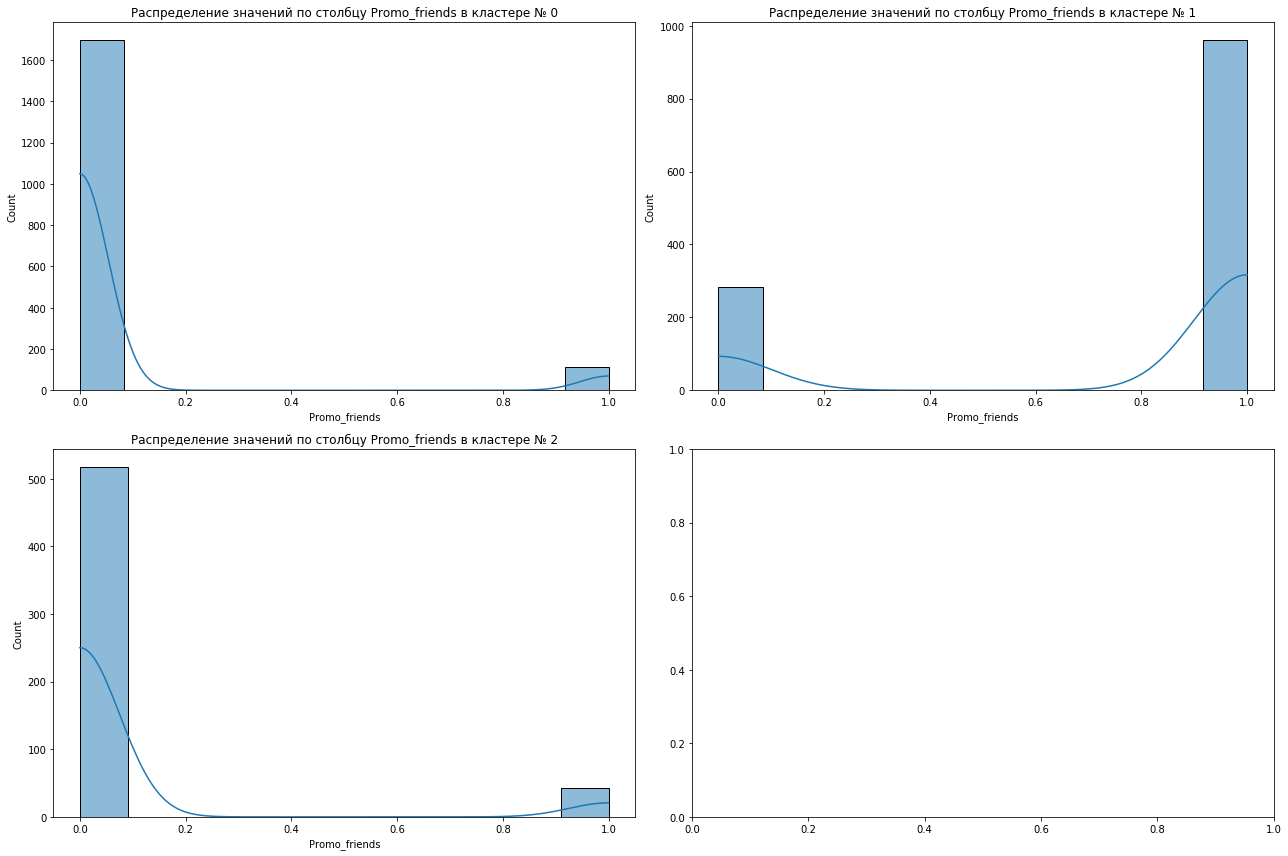

Описательные статистики по столбцу Promo_friends с разбивкой по классам


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1809.0,0.061913,0.241063,0.0,0.0,0.0,0.0,1.0
1,1244.0,0.772508,0.419381,0.0,1.0,1.0,1.0,1.0
2,561.0,0.076649,0.266271,0.0,0.0,0.0,0.0,1.0
3,386.0,0.305699,0.461301,0.0,0.0,0.0,1.0,1.0


ValueError: Could not interpret value `Phone` for parameter `x`

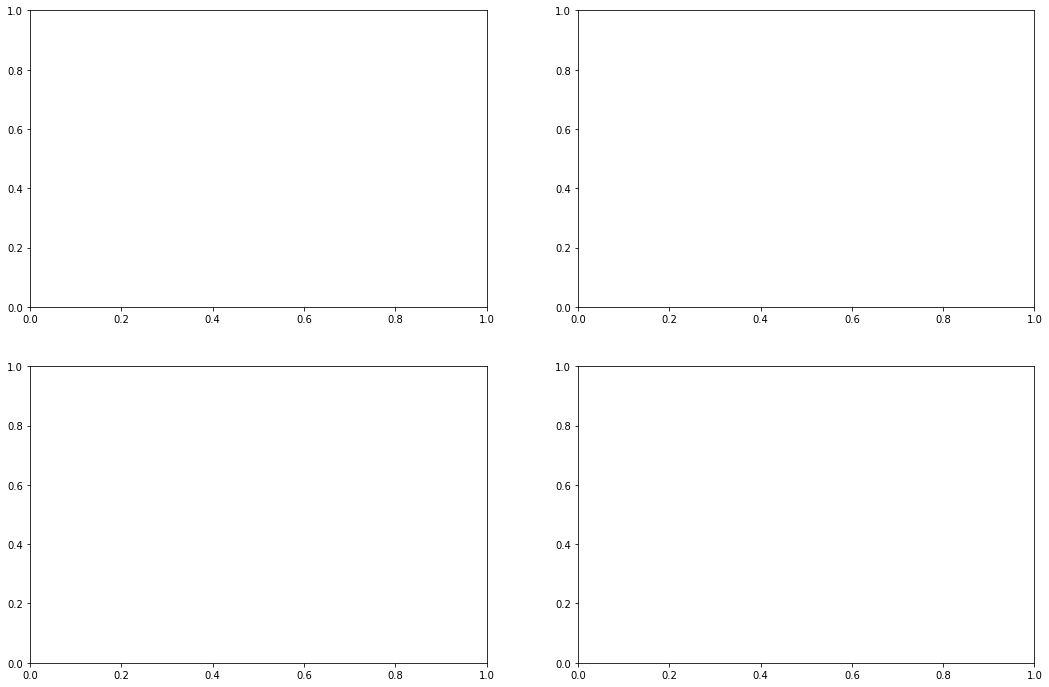

In [32]:
cluster_0 = df_without_phone.loc[df['cluster'] == 0]
cluster_1 = df_without_phone.loc[df['cluster'] == 1]
cluster_2 = df_without_phone.loc[df['cluster'] == 2]

for column in df.columns:
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))                        
    sns.histplot(data=cluster_0, x=column, kde=True, ax=ax[0,0]) 
    sns.histplot(data=cluster_1, x=column, kde=True, ax=ax[0,1])
    sns.histplot(data=cluster_2, x=column, kde=True, ax=ax[1,0])             
    ax[0,0].set_title('Распределение значений по столбцу ' + column + ' в кластере № 0')
    ax[0,1].set_title('Распределение значений по столбцу ' + column + ' в кластере № 1')
    ax[1,0].set_title('Распределение значений по столбцу ' + column + ' в кластере № 2')
    plt.tight_layout()
    plt.show()
    print('Описательные статистики по столбцу ' + column + ' с разбивкой по классам')
    display(df.groupby('cluster')[column].describe())

**Расчёт доли оттока для разных кластеров по всем полям**

In [ ]:
df.groupby('cluster')['Churn'].agg(['count', 'mean'])

**Расчёт доли оттока для разных кластеров №2 (без признака 'Phone')**

In [ ]:
df_without_phone.groupby('cluster')['Churn'].agg(['count', 'mean'])

## Выводы и рекомендации

### Исследовательский анализ данных

Информация о датасете:
- Распределение по полу: 51% мужчин, 49% женщин.
- Больше 84% клиентов проживают или работают рядом с фитнес-центром.
- Около 49% клиентов получают скидку от работодателя.
- В среднем 26,5% клиентов перестают посещать фитнес-центр. То есть каждый 4-ый клиент вероятно от вас уйдёт.
- В фитнес-центре есть часть постоянных клиентов, которые занимаются по 6 раз в неделю с момента начала действия абонемента.

### Сигналы к тому, что КЛИЕНТ возможно уйдёт в следующем месяце:
- Кол-во занятий в неделю - от 1 и меньше. Ушедшие клиенты в месяце до оттока занимались в среднем 1 раз в неделю, а те, кто остался - 2 раза в неделю.
- Посещает мало групповых занятий. Групповые занятия помогают сформировать лояльность к клубу. Ушёдшие клиенты реже занимались в групповых занятиях, чем те, кто остался.
- Купил абонемент на 1 месяц. Те, кто ушёл в 88% случаев покупали абонемент на 1 месяц.
- Не является сотрудником компании партнёра или не пришёл по акции 'Приведи друга'. С друзьями и со скидками приятней заниматься, чем без них.


### Заметки о распределении переменных:
- Чем человек старше, тем выше вероятность, что он останется в фитнес-центре на следующий месяц.
- Чем больше срок жизни клиента, тем выше вероятность, что он останется в фитнес-центре на следующий месяц. Cap
- Частота занятий у молодых людей не всегда связана с последующим оттоком: если те, кто занимался часто и всё равно ушли на следующий месяц.
- Частота занятий у взрослых людей связан с последующим оттоком: если взрослый (старше 30) часто занимается - он с высокой вероятностью продолжит заниматься в этом фитнес-центре на следующий месяц

### Кластеризация пользователей:

**Кластеризация №1 - по всем признакам.**
- Кластер №0. Портрет: живёт или работает рядом с фитнес-центром. Не является сотрудником компании-партнёра и не пришёл по акции "Приведи друга". В среднем абонемент действует на 3 месяца. Срок жизни клиента - тоже 3 месяца. С 33% вероятностью уйдёт в следующем месяце. Здесь нужно действовать быстро: у вас есть 2 месяца, чтобы убедить его остаться: групповые занятия, скидки и другие программы лояльности. Иначе - каждый третий уйдёт.
- Кластер №1. Потрет: живёт или работает рядом с фитнес-центром. Является сотрудником компании партнёра или пришёл по акции "Приведи друга". Текущий действующий абонемент в среднем на 7 месяцев. Средний срок жизни - 4,5 месяца. Лоялен к клубу. Только 10% пользователей из данного сегмента уходят на следующий месяц. Если пользователь попал в этот сегмент, то его нужно любить и обожать. Он пока от вас не уходит.
- Кластер №2. Потрет: не живёт рядом с фитнес центром. Не пришёл по акции "Приведи друга". Не посещает групповые занятия. С 50% вероятностью является сотрудником компании-партнёра. То есть: компания-партнёр дала ему скидку, он по этой скидке пришёл в ваш фитнес-центр , но живёт он не рядом - поэтому одними скидками сыт не будет. С 40% вероятностью уйдёт на следующий месяц. Если вы, конечно, не переведёте его в фитнес-центром рядом с домом или работой.
- Кластер №3. Потрет: живёт или работает рядом с фитнес-центром. С 50% вероятностью является сотрудником компании-патрнёра. Не указал наличия контактного телефона. В среднем текущий абонемент на 4,7 месяца. С 26% вероятностью уйдёт на следующий месяц.

**Без поля телефон сформировалось 3 ярких сегмента:**

- Лояльные клиенты: много посещают, покупают абонементы на длительный срок, являются сотрудниками компании-партнёра. С 10% вероятностью уйдёт на следующий месяц
- Те, кто живёт рядом, но не являтся сотрудником компании партнёра и не пришёл по акции 'Приведи друга'. Те у кого нет СКИДКИ и нет ДРУЗЕЙ. С 33% вероятностью он уйдёт в следующем месяце. Тут два варианта: найти ему друзей в клубе или предоставить какую-нибудь скидку.
- Те, кто не живёт рядом с фитнес-центром и не пришёл по акции 'Приведи друга'. Это самый отточный клиент. С 40% вероятностью он уйдёт. Нужно срочно искать ему новый клуб вашей сети рядом с домом или работей.

Стратегия по удержанию - это отдельная работа за доп. плату❤️. Я уже устал и на носу финальный спринт. С божьей помощью отправляю работу

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    


Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
        
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
Если вдруг будет дополнительный интерес по осовоению дополнительных материалов этой темы, вот достаточно неплохая информация по базовым алгоритмам:
    
https://compscicenter.ru/courses/data-mining-python/2018-spring/classes/
    
P.s. Там несколько курсов, по которым можно будет пройтись при желании 😊

    
</div>